In [3]:
#Inspecting data on customer

member = pd.read_csv('data_member.csv', sep='\t')

In [5]:
member.isna().sum()

no_client          0
client_name        1
province       24182
city           25849
religion       32752
pekerjaan      24301
no_branch         38
branchname        50
gender             0
birthdate          3
dtype: int64

In [7]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472788 entries, 0 to 472787
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   no_client    472788 non-null  object
 1   client_name  472787 non-null  object
 2   province     448606 non-null  object
 3   city         446939 non-null  object
 4   religion     440036 non-null  object
 5   pekerjaan    448487 non-null  object
 6   no_branch    472750 non-null  object
 7   branchname   472738 non-null  object
 8   gender       472788 non-null  object
 9   birthdate    472785 non-null  object
dtypes: object(10)
memory usage: 36.1+ MB


In [4]:
#sales data
sales = pd.read_csv('data_sales.csv', sep='\t')

In [13]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719136 entries, 0 to 4719135
Data columns (total 13 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   no_branch    object
 1   dt_inv       object
 2   no_inv       object
 3   no_client    object
 4   nik          object
 5   no_model     object
 6   no_color     object
 7   no_size      object
 8   qty          int64 
 9   begin_price  int64 
 10  price        int64 
 11  discount     int64 
 12  entrydate    object
dtypes: int64(4), object(9)
memory usage: 468.1+ MB


In [15]:
sales.isna().sum() #target sales 20% #gen z akan meningkat

no_branch            0
dt_inv               0
no_inv               0
no_client      3573029
nik             284585
no_model             0
no_color             0
no_size              0
qty                  0
begin_price          0
price                0
discount             0
entrydate          130
dtype: int64

In [5]:
sales0 = sales[['no_branch', 'no_model', 'no_color', 'no_size', 'qty', 'begin_price', 'price', 'discount']]
sales1 = sales[['no_model', 'no_color', 'no_branch']]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sales1 = sales1.apply(le.fit_transform)

In [6]:
sales0['no_model'] = sales1['no_model']
sales0['no_color'] = sales1['no_color']
sales0['no_branch'] = sales1['no_branch']
sales0.head()

,no_branch,no_model,no_color,no_size,qty,begin_price,price,discount
0,52,5214,475,37,1,1499000,1499000,0
1,52,3011,475,36,1,679000,679000,0
2,52,4169,456,38,1,599000,599000,0
3,52,6525,364,34,1,629000,629000,0
4,52,5469,285,36,1,1199000,1199000,0


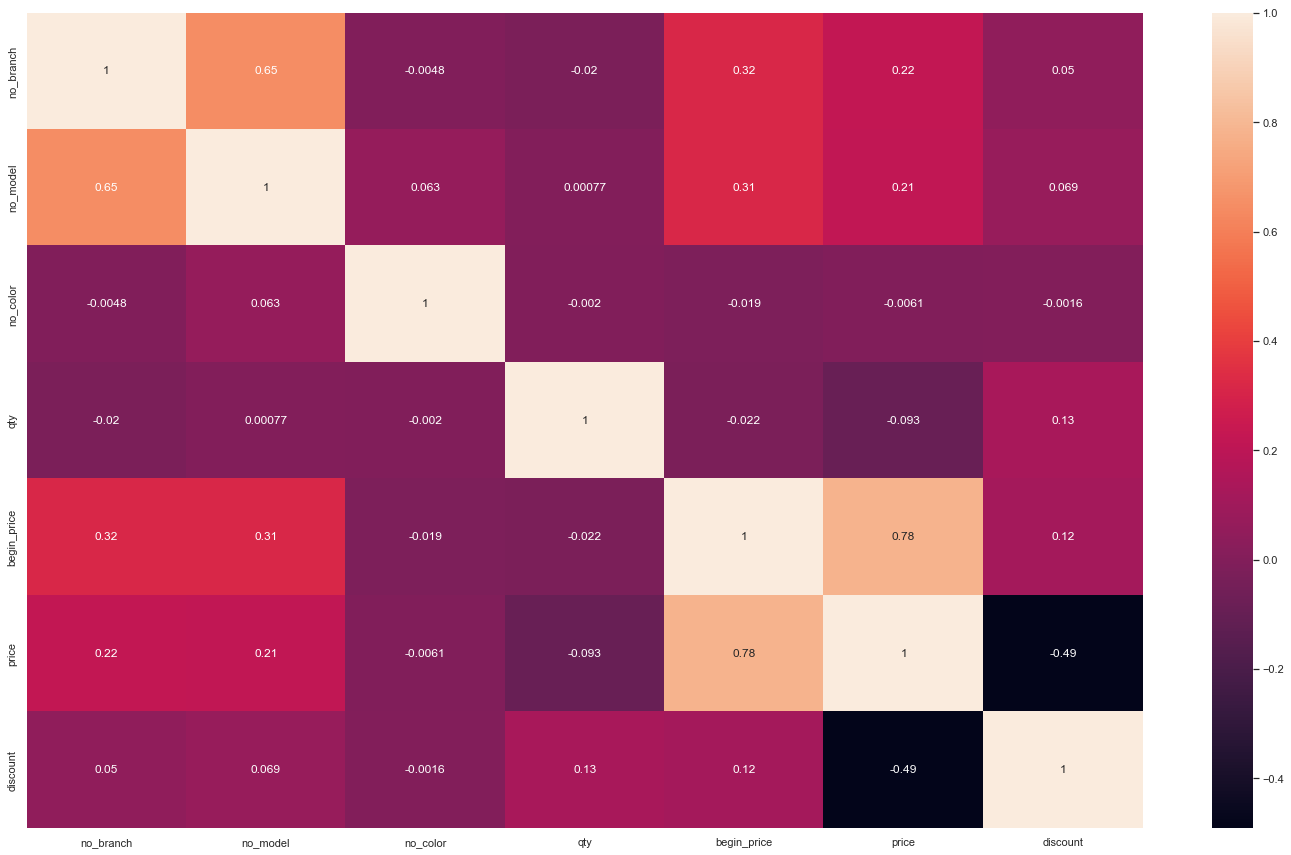

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data=sales0.corr(), annot = True) #pearson
sns.set(rc={"figure.figsize":(20, 10)})
plt.show()

In [24]:
df = pd.read_excel('D:/KCG/mean_spending.xlsx')
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
pengeluaran = [19827, 19221, 31004, 35207, 37472, 38645, 41644, 42172, 35575]
kcg = df['mean_spending']

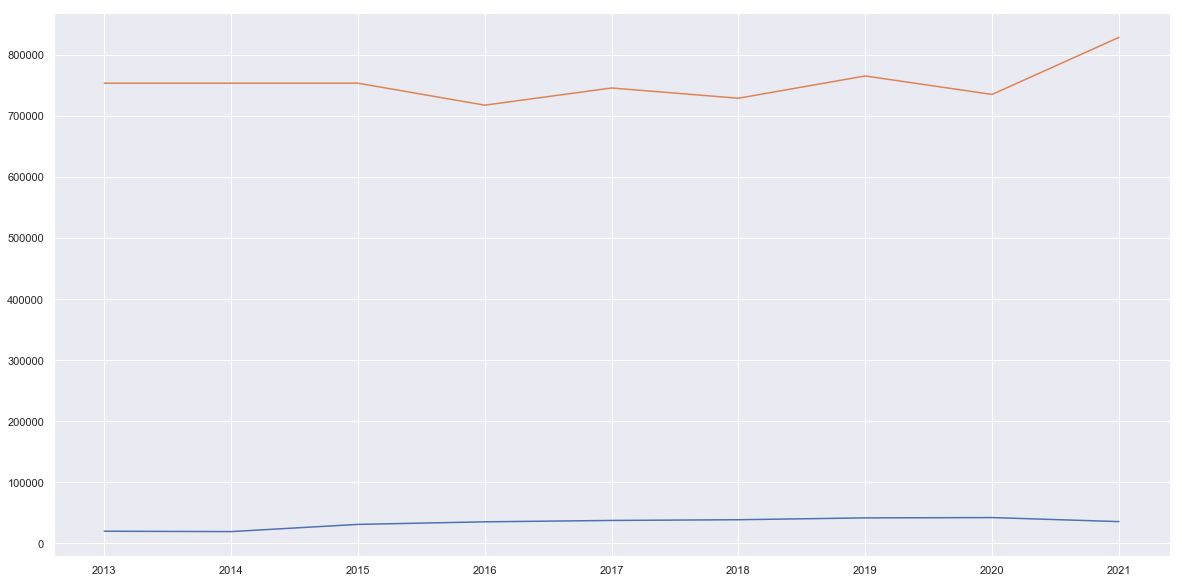

In [25]:
plt.plot(years, pengeluaran)
plt.plot(years, df['mean_spending'])
plt.show()

In [2]:
import pyodbc 
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = '192.168.1.223' 
database = 'Kurnia3' 
username = 'dtAdmin' 
password = 'Kcg123*#'
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from itertools import combinations, groupby
from collections import Counter
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

C:\Users\Izzuddin\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [34]:
import seaborn as sns

In [4]:
df = pd.read_excel('D:/KCG/mean_spending.xlsx')

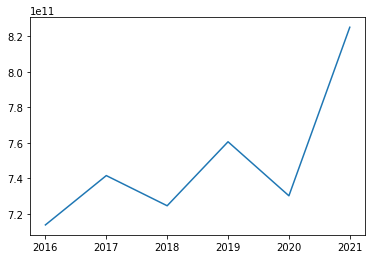

In [5]:
plt.plot(df["Tahun"], df['mean_spending'])

In [29]:
sql_query = pd.read_sql('''
                        Select dt_inv, COUNT(*) as Total_Sales
                        from dbo.v_invoiceQty
                        GROUP BY dt_inv
                        order BY dt_inv ASC;
                        ''', cnxn)

df = pd.DataFrame(sql_query, columns = ['dt_inv', 'Total_Sales'])
df.head()

,dt_inv,Total_Sales
0,2016-01-01,5410
1,2016-01-02,4928
2,2016-01-03,4306
3,2016-01-04,2032
4,2016-01-05,2276


In [40]:
sales_activity = pd.read_excel('Tableee.xlsx')
sales_activity.head()

,CK,36,CK Grand Metropolitan Bekasi,2016-01-01 00:00:00,CK250780112,HANDBAGS,PNK,37,1,1499000,1499000.1,036D02424160101,Unnamed: 12,BCAD,0,BEKASI
0,CK,11,CK Grand Indonesia,2016-01-01,CK250780112,HANDBAGS,GRY,37,1,1499000,1499000,011B56103160101,NaN,BCA,0,JAKARTA
1,CK,5,CK Mall Taman Anggrek,2016-01-01,CK250780112,HANDBAGS,BLK,37,1,1499000,1499000,005D14687160101,NaN,BCAD,0,JAKARTA
2,PD,W16,Pedro Baywalk Pluit Mall,2016-01-01,PM145180215,MENFORMAL,BLK,43,1,909000,909000,W16B02974160101,NaN,BCA,30,JAKARTA
3,PD,W10,Pedro Mall Alam Sutera,2016-01-01,PW126240008,WMNHEELS,GRY,37,1,479000,479000,W10C02377160101,NaN,NaN,50,JAKARTA
4,PD,W09,Pedro Mall Taman Anggrek,2016-01-01,PM185110203,MENSANDAL,SAN,44,1,489000,489000,W09C03779160101,504982,NaN,30,JAKARTA


# Sales Trend

In [2]:
sales_daily = pd.read_excel('total_sales_daily.xlsx')
sales_daily.set_index(pd.DatetimeIndex(pd.to_datetime(sales_daily['dt_inv'])), inplace=True)
sales_daily.head()

,dt_inv,total_sales
dt_inv,,
2016-01-01,2016-01-01,5405
2016-01-02,2016-01-02,4924
2016-01-03,2016-01-03,4299
2016-01-04,2016-01-04,2031
2016-01-05,2016-01-05,2274


In [5]:
tahun1 = sales_daily['2016-01-01':'2016-12-31']
tahun2 = sales_daily['2017-01-01':'2017-12-31']
tahun3 = sales_daily['2018-01-01':'2018-12-31']
tahun4 = sales_daily['2019-01-01':'2019-12-31']
tahun5 = sales_daily['2020-01-01':'2020-12-31']
tahun6 = sales_daily['2021-01-01':'2021-11-01']

C:\Users\Izzuddin\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


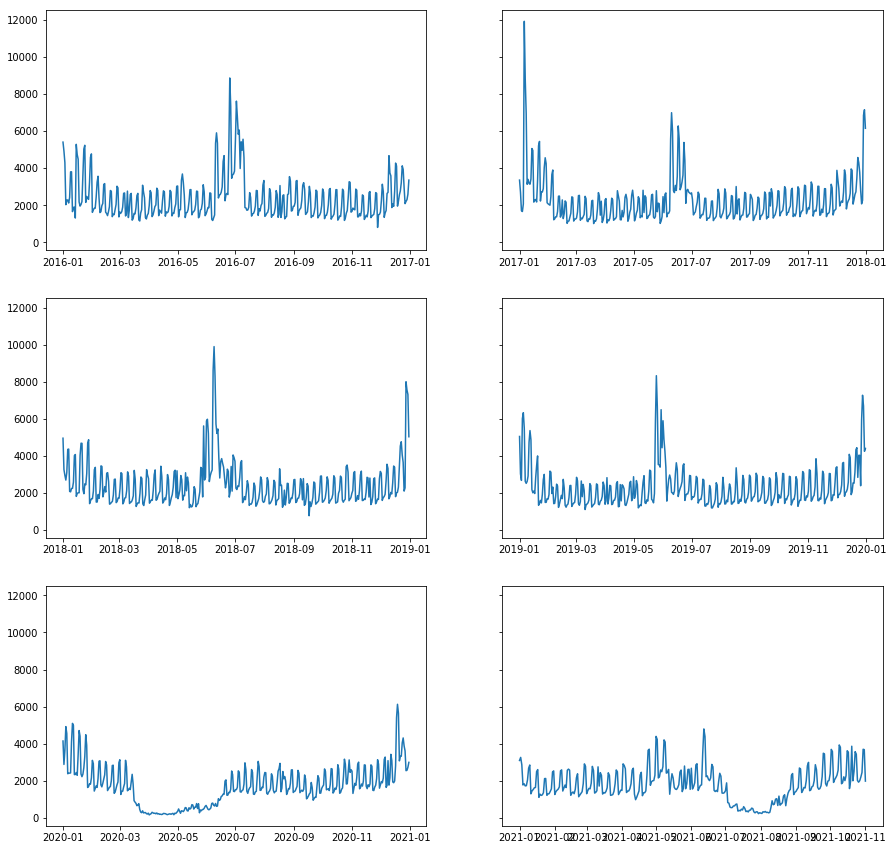

In [6]:
fig, ax = plt.subplots(3, 2, figsize=(15,15), sharey = True)

ax[0,0].plot(tahun1['dt_inv'], tahun1['total_sales'])
ax[0,1].plot(tahun2['dt_inv'], tahun2['total_sales'])
ax[1,0].plot(tahun3['dt_inv'], tahun3['total_sales'])
ax[1,1].plot(tahun4['dt_inv'], tahun4['total_sales'])
ax[2,0].plot(tahun5['dt_inv'], tahun5['total_sales'])
ax[2,1].plot(tahun6['dt_inv'], tahun6['total_sales'])

# Exploratory Data Analysis

In [28]:
sql_query = pd.read_sql('''
                        select no_inv, no_group
                        from v_invoiceQty
                        left join m_model
                        on v_invoiceQty.no_model = m_model.model_name
                        where v_invoiceQty.nett <> 0 and v_invoiceQty.note NOT LIKE '%retur%'
                        ''', cnxn)

sales_activity = pd.DataFrame(sql_query, columns = ['no_inv', 'no_group'])
sales_activity.head()

,no_inv,no_group
0,020SM06775170628,SIGNCK
1,020SM06775170628,SIGNCK
2,018CN01305181112,SHOECARECK
3,018CN01305181112,BAGSCK
4,018CN01306181112,BAGSCK


In [41]:
sales_activity = pd.DataFrame(
    np.row_stack([sales_activity.columns, sales_activity.values]),
    columns=['company', "id_branch", 'branchname', 'dt_inv', 'no_model', 'subgroup2', 'no_clr', 'no_size', 'qty', 'prie', 'nett', 'no_inv', 'no_clt', 'no_bank', 'disc', 'payrollschema']
)
sales_activity.head()

,company,id_branch,branchname,dt_inv,no_model,subgroup2,no_clr,no_size,qty,prie,nett,no_inv,no_clt,no_bank,disc,payrollschema
0,CK,36,CK Grand Metropolitan Bekasi,2016-01-01,CK250780112,HANDBAGS,PNK,37,1,1499000,1499000.1,036D02424160101,Unnamed: 12,BCAD,0,BEKASI
1,CK,11,CK Grand Indonesia,2016-01-01,CK250780112,HANDBAGS,GRY,37,1,1499000,1499000,011B56103160101,NaN,BCA,0,JAKARTA
2,CK,5,CK Mall Taman Anggrek,2016-01-01,CK250780112,HANDBAGS,BLK,37,1,1499000,1499000,005D14687160101,NaN,BCAD,0,JAKARTA
3,PD,W16,Pedro Baywalk Pluit Mall,2016-01-01,PM145180215,MENFORMAL,BLK,43,1,909000,909000,W16B02974160101,NaN,BCA,30,JAKARTA
4,PD,W10,Pedro Mall Alam Sutera,2016-01-01,PW126240008,WMNHEELS,GRY,37,1,479000,479000,W10C02377160101,NaN,NaN,50,JAKARTA


In [4]:
#sales_activity['no_clt'].replace("", 'Regular')
#sales_activity['no_bank'].replace("", 'Cash')
sales_activity['no_group']=sales_activity['no_group'].replace('', 'Others')

In [22]:
sales_activity['no_group'].describe()

count     6245412
unique         42
top       SHOESCK
freq      1959891
Name: no_group, dtype: object

In [67]:
sales_activity_ok = sales_activity[['no_inv', 'subgroup2']]
sales_activity_ok.head(10)

,no_inv,subgroup2
0,020SM06775170628,HEELS
1,020SM06775170628,HEELS
2,018CN01305181112,Others
3,018CN01305181112,Others
4,018CN01306181112,Others
5,018CN01306181112,Others
6,018SM06817181112,HEELS
7,018SM06818181112,WEDGES
8,018SM06820181112,HEELS
9,018SM06820181112,HEELS


In [23]:
sales_activity_ok = sales_activity.set_index('no_inv')['no_group'].rename('item_name')
sales_activity_ok.head()

no_inv
020SM06775170628        SIGNCK
020SM06775170628        SIGNCK
018CN01305181112    SHOECARECK
018CN01305181112        BAGSCK
018CN01306181112        BAGSCK
Name: item_name, dtype: object

# Association Trial

In [14]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().to_numpy()
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns]

In [31]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support * 100]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [32]:
rules = association_rules(sales_activity_ok, 0.01)

Starting order_item:                6249809
Items with support >= 0.01:              27
Remaining order_item:               6244381
Remaining orders with 2+ items:     1785633
Remaining order_item:               4502322
Item pairs:                             265
Item pairs with support >= 0.01:         20



In [29]:
item_name = sales_activity.rename(columns={'no_inv':'item_id', 'no_group':'item_name'})

In [33]:
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift


# Customer Relationship Management

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn import preprocessing
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load Data
CRM = pd.read_sql('''
--cust RFM
select convert(date, dt_inv) as tanggal_transaksi, no_inv, sales.no_client, qty, price
from sales
inner join branch
on sales.no_branch = branch.no_branch
where sales.no_client <> '' and company = 'PD'
order by convert(datetime, dt_inv) asc
''', cnxn)

In [5]:
CRM.isnull().sum()

tanggal_transaksi    0
no_inv               0
no_client            0
qty                  0
price                0
dtype: int64

In [5]:
#Checking Variables

def check_df(dataframe):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(3))
    print("##################### Tail #####################")
    print(dataframe.tail(3))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(CRM)

##################### Shape #####################
(298062, 5)
##################### Types #####################
tanggal_transaksi     object
no_inv                object
no_client             object
qty                    int64
price                float64
dtype: object
##################### Head #####################
  tanggal_transaksi  no_inv no_client  qty      price
0        2016-01-01  B05104    534481    1  1149000.0
1        2016-01-01  B05104    534481    1  1199000.0
2        2016-01-01  B05568    530506    1  1249000.0
##################### Tail #####################
       tanggal_transaksi       no_inv no_client  qty      price
298059        2021-12-10  W0821120546  PD005206    1  1649000.0
298060        2021-12-10  W1521120623  PD182991    1  1799000.0
298061        2021-12-10  W2221120782  PD043533    1   999000.0
##################### NA #####################
tanggal_transaksi    0
no_inv               0
no_client            0
qty                  0
price               

In [7]:
CRM.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
qty,298062.0,9.987117e-01,0.255526,-1.0,1.0,1.0,1.0,1.0,1.0,48.0
price,298062.0,1.092327e+06,441450.354277,49000.0,109000.0,849000.0,1149000.0,1399000.0,2149000.0,2499000.0


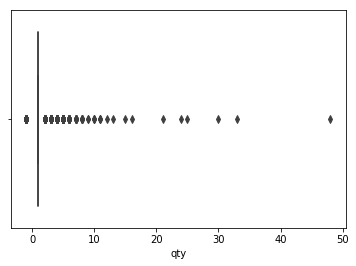

In [8]:
sns.boxplot(CRM["qty"]);

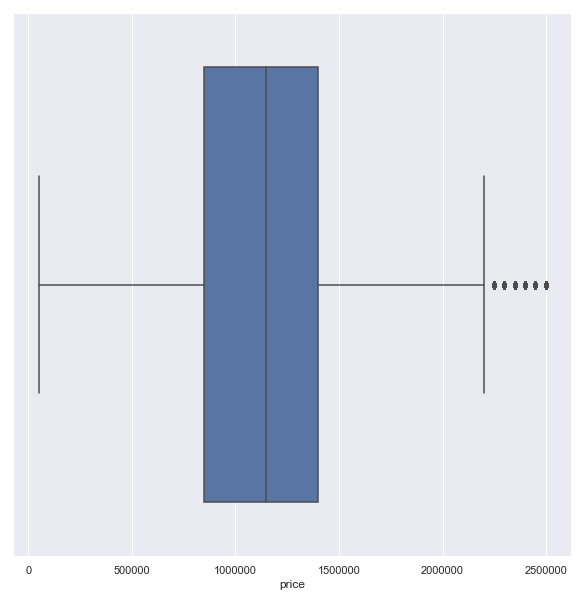

In [21]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(CRM["price"]);

In [6]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [7]:
replace_with_thresholds(CRM,"qty")

In [8]:
replace_with_thresholds(CRM,"price")

In [9]:
# outliers values are now cleaner.

CRM.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
qty,298062.0,9.880159e-01,0.154352,-1.0,1.0,1.0,1.0,1.0,1.0,1.0
price,298062.0,1.092327e+06,441450.354277,49000.0,109000.0,849000.0,1149000.0,1399000.0,2149000.0,2499000.0


In [10]:
def crm_data_prep(dataframe):
    dataframe = dataframe[dataframe["qty"] > 0]
    dataframe["TotalPrice"] = dataframe["qty"] * dataframe["price"]
    return dataframe

In [11]:
CRM_1=crm_data_prep(CRM)
check_df(CRM_1)

##################### Shape #####################
(296276, 6)
##################### Types #####################
tanggal_transaksi     object
no_inv                object
no_client             object
qty                    int64
price                float64
TotalPrice           float64
dtype: object
##################### Head #####################
  tanggal_transaksi  no_inv no_client  qty      price  TotalPrice
0        2016-01-01  B05104    534481    1  1149000.0   1149000.0
1        2016-01-01  B05104    534481    1  1199000.0   1199000.0
2        2016-01-01  B05568    530506    1  1249000.0   1249000.0
##################### Tail #####################
       tanggal_transaksi       no_inv no_client  qty      price  TotalPrice
298059        2021-12-10  W0821120546  PD005206    1  1649000.0   1649000.0
298060        2021-12-10  W1521120623  PD182991    1  1799000.0   1799000.0
298061        2021-12-10  W2221120782  PD043533    1   999000.0    999000.0
##################### NA #########

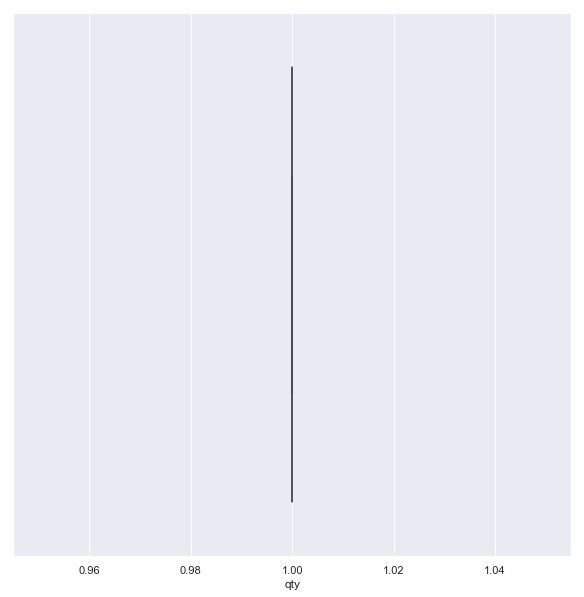

In [31]:
sns.boxplot(CRM_1["qty"])

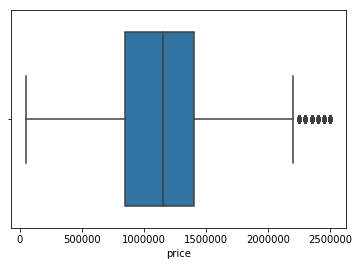

In [11]:
sns.boxplot(CRM_1["price"])

# RFM

In [34]:
# last transaction date

CRM["tanggal_transaksi"].max()

'2021-12-10'

In [12]:
def create_rfm(dataframe):
    # RFM Metrics
    
    today_date = dt.datetime(2021, 12, 22)

    rfm = dataframe.groupby('no_client').agg({'tanggal_transaksi': lambda date: (today_date - date.max()).days,
                                                'no_inv': lambda num: num.nunique(),
                                                "TotalPrice": lambda price: price.sum()})

    rfm.columns = ['recency', 'frequency', "monetary"]

    rfm = rfm[(rfm['monetary'] > 0)]

    # RFM score
    rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
    rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

    # segment naming
    rfm['rfm_segment'] = rfm['recency_score'].astype(str) + rfm['frequency_score'].astype(str)

    seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

    rfm['rfm_segment'] = rfm['rfm_segment'].replace(seg_map, regex=True)
    rfm = rfm[["recency", "frequency", "monetary", "rfm_segment"]]
    return rfm

In [13]:
CRM_1['tanggal_transaksi'] = pd.to_datetime(CRM_1['tanggal_transaksi'])

In [14]:
CRM_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296276 entries, 0 to 298061
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tanggal_transaksi  296276 non-null  datetime64[ns]
 1   no_inv             296276 non-null  object        
 2   no_client          296276 non-null  object        
 3   qty                296276 non-null  int64         
 4   price              296276 non-null  float64       
 5   TotalPrice         296276 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.8+ MB


In [14]:
rfm = create_rfm(CRM_1)
rfm.head()

,recency,frequency,monetary,rfm_segment
no_client,,,,
08117497798,476,1,399000.0,about_to_sleep
0811789292,1200,1,2698000.0,hibernating
081222739589,468,1,978000.0,about_to_sleep
081222758579,470,1,1399000.0,about_to_sleep
08125528522,473,1,629000.0,about_to_sleep


In [15]:
rfm.describe([0.01,0.25,0.50,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
recency,98780.0,6.841918e+02,5.403405e+02,12.0,17.0,227.0,573.5,1052.0,2069.0,2182.0
frequency,98780.0,2.279166e+00,3.274476e+00,1.0,1.0,1.0,1.0,3.0,12.0,314.0
monetary,98780.0,3.273711e+06,5.002973e+06,49000.0,239000.0,1299000.0,1948000.0,3697000.0,19623730.0,453323000.0


[Text(0.5, 1.0, 'Rata-rata Waktu Terakhir Transaksi per Segmentasi (dalam hari)')]

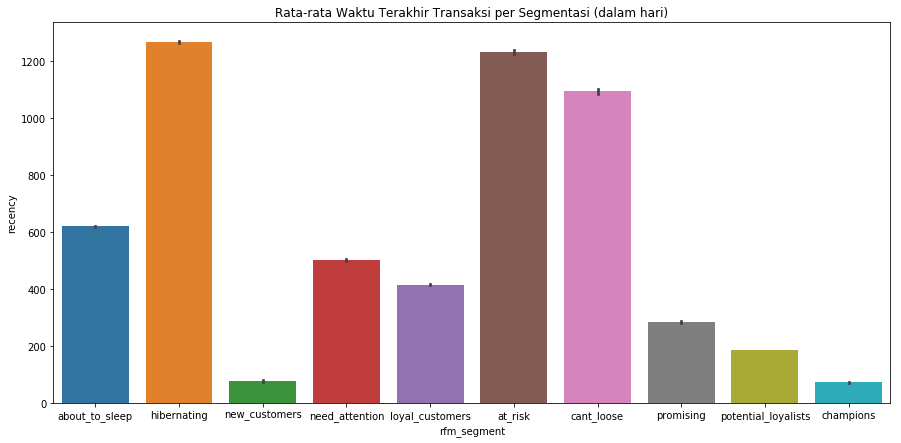

In [16]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="recency", data=rfm).set(title='Rata-rata Waktu Terakhir Transaksi per Segmentasi (dalam hari)')

[Text(0.5, 1.0, 'Rata-rata Jumlah Transaksi per Segmentasi')]

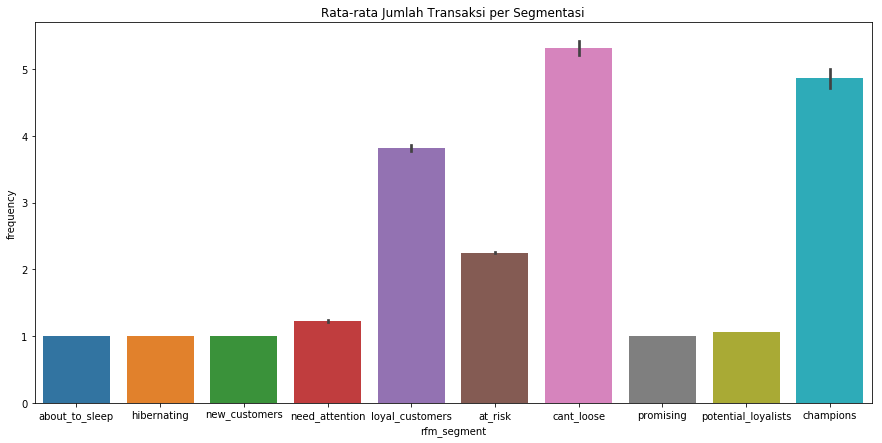

In [17]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="frequency", data=rfm).set(title='Rata-rata Jumlah Transaksi per Segmentasi')

In [24]:
check_df(rfm)

##################### Shape #####################
(98780, 4)
##################### Types #####################
recency          int64
frequency        int64
monetary       float64
rfm_segment     object
dtype: object
##################### Head #####################
              recency  frequency   monetary     rfm_segment
no_client                                                  
08117497798       471          1   399000.0  about_to_sleep
0811789292       1195          1  2698000.0     hibernating
081222739589      463          1   978000.0  about_to_sleep
##################### Tail #####################
             recency  frequency   monetary          rfm_segment
no_client                                                      
V000001         1594          1   849000.0              at_risk
W0921110004       46          1   949000.0  potential_loyalists
du              1420          1  2427000.0              at_risk
##################### NA #####################
recency        0
f

In [18]:
def create_cltv_calculated(dataframe):
    # avg_order_value
    dataframe['avg_order_value'] = dataframe['monetary'] / dataframe['frequency']

    # purchase_frequency
    dataframe["purchase_frequency"] = dataframe['frequency'] / dataframe.shape[0]

    # repeat rate & churn rate
    repeat_rate = dataframe[dataframe.frequency > 1].shape[0] / dataframe.shape[0]
    churn_rate = 1 - repeat_rate

    # profit_margin
    dataframe['profit_margin'] = dataframe['monetary'] * 0.05

    # Customer Value
    dataframe['cv'] = (dataframe['avg_order_value'] * dataframe["purchase_frequency"])

    # Customer Lifetime Value
    dataframe['cltv'] = (dataframe['cv'] / churn_rate) * dataframe['profit_margin']

    # normalize cltv
    '''scaler = MinMaxScaler(feature_range=(1, 10))
    scaler.fit(dataframe[["cltv"]])
    dataframe["cltv_calculated"] = scaler.transform(dataframe[["cltv"]])'''

    dataframe["cltv_segment"] = pd.qcut(dataframe["cltv"], 3, labels=["C", "B", "A"])

    dataframe = dataframe[["recency", "frequency", "monetary", "rfm_segment",
                           "cltv", "cltv_segment"]]

    return dataframe

In [19]:
rfm_cltv = create_cltv_calculated(rfm)
check_df(rfm_cltv)

##################### Shape #####################
(98780, 6)
##################### Types #####################
recency            int64
frequency          int64
monetary         float64
rfm_segment       object
cltv             float64
cltv_segment    category
dtype: object
##################### Head #####################
              recency  frequency   monetary     rfm_segment          cltv  \
no_client                                                                   
08117497798       476          1   399000.0  about_to_sleep  1.502718e+05   
0811789292       1200          1  2698000.0     hibernating  6.870933e+06   
081222739589      468          1   978000.0  about_to_sleep  9.028374e+05   

             cltv_segment  
no_client                  
08117497798             C  
0811789292              B  
081222739589            C  
##################### Tail #####################
             recency  frequency   monetary          rfm_segment          cltv  \
no_client           

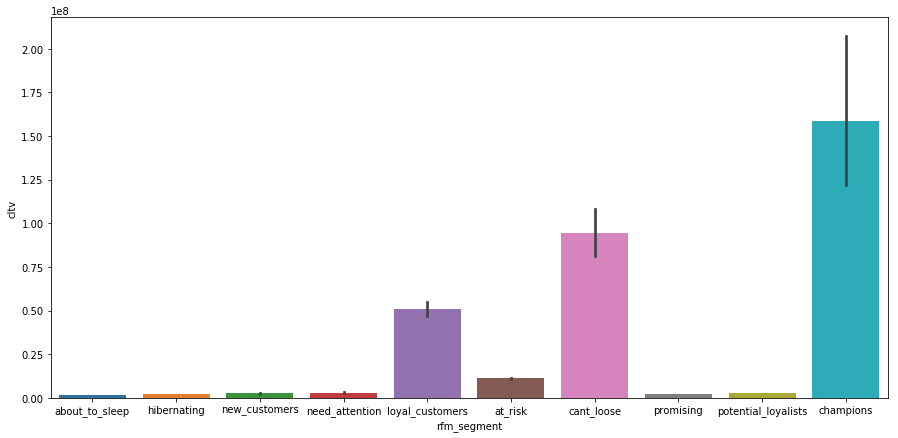

In [20]:
plt.figure(figsize=(15,7))
sns.barplot(x="rfm_segment", y="cltv", data=rfm_cltv)

In [21]:
!pip install pyomo

In [50]:
rfm_cltv.head()

,recency,frequency,monetary,rfm_segment,cltv,cltv_segment
no_client,,,,,,
08117497798,471,1,399000.0,about_to_sleep,1.502718e+05,C
0811789292,1195,1,2698000.0,hibernating,6.870933e+06,B
081222739589,463,1,978000.0,about_to_sleep,9.028374e+05,C
081222758579,465,1,1399000.0,about_to_sleep,1.847427e+06,C
08125528522,468,1,629000.0,about_to_sleep,3.734506e+05,C


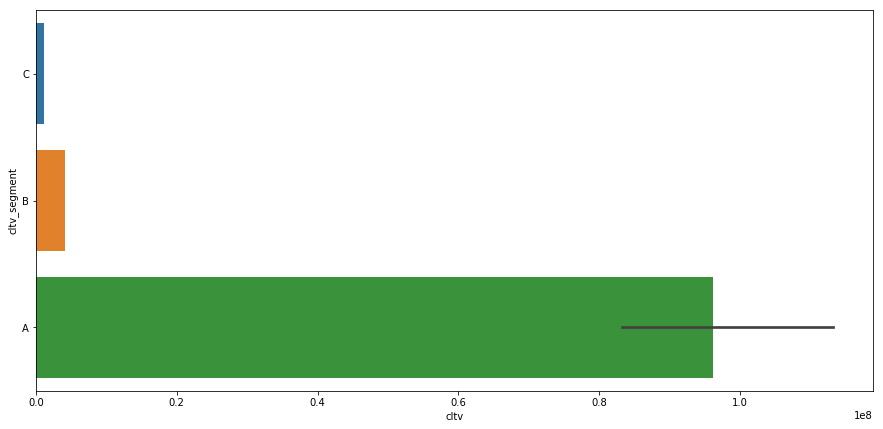

In [22]:
plt.figure(figsize=(15,7))
sns.barplot(x="cltv", y="cltv_segment", data=rfm_cltv)

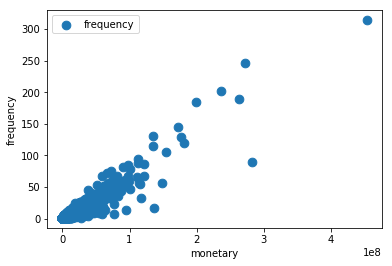

In [52]:
plt.scatter(rfm_cltv[rfm_cltv['frequency']<400].monetary,rfm_cltv[rfm_cltv['frequency']<400].frequency,s=75)


plt.xlabel("monetary")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [53]:
rfm_cltv.corr()

,recency,frequency,monetary,cltv
recency,1.000000,-0.163839,-0.157412,-0.02778
frequency,-0.163839,1.000000,0.936600,0.64758
monetary,-0.157412,0.936600,1.000000,0.63848
cltv,-0.027780,0.647580,0.638480,1.00000


In [23]:
def create_cltv_predicted(dataframe):
    today_date = dt.datetime(2021, 12, 17)

    ## recency value customized
    rfm = dataframe.groupby('no_client').agg({'tanggal_transaksi': [lambda date: (date.max()-date.min()).days,
                                                                lambda date: (today_date - date.min()).days],
                                                'no_inv': lambda num: num.nunique(),
                                                'TotalPrice': lambda TotalPrice: TotalPrice.sum()})

    rfm.columns = rfm.columns.droplevel(0)

    ## recency_cltv_predicted
    rfm.columns = ['recency_cltv_predicted', 'T', 'frequency', 'monetary']

    ## basic monetary_avg
    rfm["monetary"] = rfm["monetary"] / rfm["frequency"]

    rfm.rename(columns={"monetary": "monetary_avg"}, inplace=True)


  
    ## recency_weekly_cltv_predicted
    rfm["recency_weekly_cltv_predicted"] = rfm["recency_cltv_predicted"] / 7
    rfm["T_weekly"] = rfm["T"] / 7

    

    # CONTROL
    rfm = rfm[rfm["monetary_avg"] > 0]

    ## recency filter
    rfm = rfm[(rfm['frequency'] > 1)]

    rfm["frequency"] = rfm["frequency"].astype(int)

    # BGNBD
    bgf = BetaGeoFitter(penalizer_coef=0.01)
    bgf.fit(rfm['frequency'],
            rfm['recency_weekly_cltv_predicted'],
            rfm['T_weekly'])


    # Gamma Gamma
    ggf = GammaGammaFitter(penalizer_coef=0.01)
    ggf.fit(rfm['frequency'], rfm['monetary_avg'])
    rfm["expected_average_profit"] = ggf.conditional_expected_average_profit(rfm['frequency'],
                                                                             rfm['monetary_avg'])
    # 6 months cltv_p
    cltv = ggf.customer_lifetime_value(bgf,
                                       rfm['frequency'],
                                       rfm['recency_weekly_cltv_predicted'],
                                       rfm['T_weekly'],
                                       rfm['monetary_avg'],
                                       time=6,
                                       freq="W",
                                       discount_rate=0.01)

    rfm["cltv_predicted"] = cltv

    #minmaxscaler
    '''scaler = MinMaxScaler(feature_range=(1, 100))
    scaler.fit(rfm[["cltv_predicted"]])
    rfm["cltv_predicted"] = scaler.transform(rfm[["cltv_predicted"]])'''

    # rfm.fillna(0, inplace=True)

    # cltv_predicted_segment
    rfm["cltv_predicted_segment"] = pd.qcut(rfm["cltv_predicted"], 5, labels=["E","D", "C", "B", "A"])

    ## recency_cltv_predicted, recency_weekly_cltv_predicted
    rfm = rfm[['frequency', "recency_cltv_predicted", "T", "monetary_avg", "recency_weekly_cltv_predicted", "T_weekly",
               "expected_average_profit","cltv_predicted", "cltv_predicted_segment"]]


    return rfm

In [24]:
rfm_cltv_predicted = create_cltv_predicted(CRM_1)
check_df(rfm_cltv_predicted)

##################### Shape #####################
(45809, 9)
##################### Types #####################
frequency                           int32
recency_cltv_predicted              int64
T                                   int64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
              frequency  recency_cltv_predicted     T  monetary_avg  \
no_client                                                             
085701053500          2                       6   469      324000.0   
234567                4                    1040  1644     1468750.0   
500412                2                     528  2151     1673500.0   

              recency_weekly_cltv_predicted    T_weekly  \
no_client                        

In [25]:
# 10 customers expected to make the most purchases in next 6 months
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(rfm_cltv_predicted['frequency'], rfm_cltv_predicted['recency_cltv_predicted'], rfm_cltv_predicted['T'])

bgf.conditional_expected_number_of_purchases_up_to_time(4 * 6, 
                                           # weeks * count = months
                                                        rfm_cltv_predicted['frequency'],
                                                        rfm_cltv_predicted['recency_cltv_predicted'],
                                                        rfm_cltv_predicted['T']).sort_values(ascending=False).head(10)

no_client
PD214430    5.504304
PD037172    4.718312
PD209671    4.046081
PD070375    3.629854
PD031706    3.501106
PD079636    3.165060
PD050515    3.094170
PD005674    3.018589
PD269404    2.486010
PD215714    2.340186
dtype: float64

In [59]:
rfm_cltv_predicted.tail()

,frequency,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
no_client,,,,,,,,,
PD275891,2,1,9,1.499000e+06,0.142857,1.285714,1.919305e+06,8.568878e+06,A
PD275912,2,0,7,1.169000e+06,0.000000,1.000000,1.496776e+06,7.102060e+06,A
PD275928,2,0,8,1.324000e+06,0.000000,1.142857,1.695237e+06,7.616686e+06,A
PD275940,4,1,9,2.232250e+06,0.142857,1.285714,2.506721e+06,1.739911e+07,A
PD276041,3,0,8,6.823333e+05,0.000000,1.142857,7.989782e+05,4.652167e+06,A


In [26]:
crm_final = rfm_cltv.merge(rfm_cltv_predicted, on="no_client", how="left")
check_df(crm_final)

##################### Shape #####################
(98780, 15)
##################### Types #####################
recency                             int64
frequency_x                         int64
monetary                          float64
rfm_segment                        object
cltv                              float64
cltv_segment                     category
frequency_y                       float64
recency_cltv_predicted            float64
T                                 float64
monetary_avg                      float64
recency_weekly_cltv_predicted     float64
T_weekly                          float64
expected_average_profit           float64
cltv_predicted                    float64
cltv_predicted_segment           category
dtype: object
##################### Head #####################
              recency  frequency_x   monetary     rfm_segment          cltv  \
no_client                                                                     
08117497798       474            1   

In [27]:
crm_final.sort_values(by="monetary_avg", ascending=False).head()

,recency,frequency_x,monetary,rfm_segment,cltv,cltv_segment,frequency_y,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
no_client,,,,,,,,,,,,,,,
PD242499,38,7,76911000.0,champions,5.583529e+09,A,7.0,148.0,183.0,1.098729e+07,21.142857,26.142857,1.172062e+07,4.218304e+07,A
PD136863,201,4,38435000.0,loyal_customers,1.394394e+09,A,4.0,753.0,951.0,9.608750e+06,107.571429,135.857143,1.079021e+07,5.876261e+06,A
PD112072,1087,2,18007000.0,at_risk,3.060656e+08,A,2.0,25.0,1109.0,9.003500e+06,3.571429,158.428571,1.152799e+07,3.537702e+03,D
PD001519,1173,7,58300000.0,cant_loose,3.208255e+09,A,7.0,770.0,1940.0,8.328571e+06,110.000000,277.142857,8.884453e+06,5.487313e+04,D
PD043122,235,4,32504000.0,loyal_customers,9.972532e+08,A,4.0,1274.0,1506.0,8.126000e+06,182.000000,215.142857,9.125147e+06,3.511076e+06,A


In [28]:
q = crm_final.sort_values(by="monetary_avg", ascending=False)

In [29]:
q.to_excel(r'C:\Users\Izzuddin\KCG\cust_pred.xlsx', sheet_name='Prediction')

In [ ]:
#Results Analysis

In [30]:
q.head()

,recency,frequency_x,monetary,rfm_segment,cltv,cltv_segment,frequency_y,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted,cltv_predicted_segment
no_client,,,,,,,,,,,,,,,
PD242499,38,7,76911000.0,champions,5.583529e+09,A,7.0,148.0,183.0,1.098729e+07,21.142857,26.142857,1.172062e+07,4.218304e+07,A
PD136863,201,4,38435000.0,loyal_customers,1.394394e+09,A,4.0,753.0,951.0,9.608750e+06,107.571429,135.857143,1.079021e+07,5.876261e+06,A
PD112072,1087,2,18007000.0,at_risk,3.060656e+08,A,2.0,25.0,1109.0,9.003500e+06,3.571429,158.428571,1.152799e+07,3.537702e+03,D
PD001519,1173,7,58300000.0,cant_loose,3.208255e+09,A,7.0,770.0,1940.0,8.328571e+06,110.000000,277.142857,8.884453e+06,5.487313e+04,D
PD043122,235,4,32504000.0,loyal_customers,9.972532e+08,A,4.0,1274.0,1506.0,8.126000e+06,182.000000,215.142857,9.125147e+06,3.511076e+06,A


In [41]:
q.corr()

,recency,frequency_x,monetary,cltv,frequency_y,recency_cltv_predicted,T,monetary_avg,recency_weekly_cltv_predicted,T_weekly,expected_average_profit,cltv_predicted
recency,1.000000,-0.163839,-0.157412,-0.027780,-0.142866,-0.335312,0.693977,-0.016883,-0.335312,0.693977,0.027760,-0.426147
frequency_x,-0.163839,1.000000,0.936600,0.647580,1.000000,0.352476,0.133620,0.033300,0.352476,0.133620,-0.080368,0.444313
monetary,-0.157412,0.936600,1.000000,0.638480,0.929619,0.338295,0.123520,0.290884,0.338295,0.123520,0.164230,0.499655
cltv,-0.027780,0.647580,0.638480,1.000000,0.694897,0.071825,0.025188,0.043264,0.071825,0.025188,0.019454,0.358433
frequency_y,-0.142866,1.000000,0.929619,0.694897,1.000000,0.352476,0.133620,0.033300,0.352476,0.133620,-0.080368,0.444313
recency_cltv_predicted,-0.335312,0.352476,0.338295,0.071825,0.352476,1.000000,0.445616,0.012082,1.000000,0.445616,-0.091728,0.130235
T,0.693977,0.133620,0.123520,0.025188,0.133620,0.445616,1.000000,-0.006809,0.445616,1.000000,-0.043724,-0.305410
monetary_avg,-0.016883,0.033300,0.290884,0.043264,0.033300,0.012082,-0.006809,1.000000,0.012082,-0.006809,0.976231,0.250385
recency_weekly_cltv_predicted,-0.335312,0.352476,0.338295,0.071825,0.352476,1.000000,0.445616,0.012082,1.000000,0.445616,-0.091728,0.130235
T_weekly,0.693977,0.133620,0.123520,0.025188,0.133620,0.445616,1.000000,-0.006809,0.445616,1.000000,-0.043724,-0.305410


# Customer Clustering (PEDRO)

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [4]:
cust_pd = pd.read_sql('''
select pekerjaan, religion as agama, gender, datediff(year, birthdate, '2022-01-01') as age, branch.city as kota, branch.branchname as cabang, sales.price as spending
from sales
inner join branch
on sales.no_branch = branch.no_branch
inner join customer
on sales.no_client = customer.no_client
where company = 'PD'
                  ''', cnxn)

In [33]:
cust_pd.head()

,pekerjaan,agama,gender,age,kota,cabang,spending
0,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1449000.0
1,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1199000.0
2,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1499000.0
3,Professional,Islam,FEMALE,43.0,PALEMBANG,Pedro Palembang Icon,1499000.0
4,Housewife,Islam,FEMALE,42.0,BANDUNG,Pedro 23 Paskal Bandung,639000.0


In [34]:
cust_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136829 entries, 0 to 136828
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   pekerjaan  136756 non-null  object 
 1   agama      136756 non-null  object 
 2   gender     136829 non-null  object 
 3   age        136828 non-null  float64
 4   kota       136829 non-null  object 
 5   cabang     136829 non-null  object 
 6   spending   136829 non-null  float64
dtypes: float64(2), object(5)
memory usage: 7.3+ MB


In [5]:
cust_pd = cust_pd.dropna()
cust_pd['agama'] = cust_pd['agama'].replace('', 'Others')
cust_pd['pekerjaan'] = cust_pd['pekerjaan'].replace('', 'Others')
cust_pd['gender'] = cust_pd['gender'].replace('', 'Others')

In [56]:
cust_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136756 entries, 0 to 136828
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   pekerjaan  136756 non-null  object 
 1   agama      136756 non-null  object 
 2   gender     136756 non-null  object 
 3   age        136756 non-null  float64
 4   kota       136756 non-null  object 
 5   cabang     136756 non-null  object 
 6   spending   136756 non-null  float64
dtypes: float64(2), object(5)
memory usage: 8.3+ MB


In [6]:
# converting age into a group
cust_pd['age_bin'] = pd.cut(cust_pd['age'], [0, 23, 39, 55, 74, 130], 
                              labels=['0-23', '24-39', '40-55', '56-74','> 75'])
cust_pd  = cust_pd.drop('age',axis = 1)

cust_pd['spending_bin'] = pd.cut(cust_pd['spending'], [0, 499000, 999000, 1499000,1999999,4999999],
                             labels=['0-499.000', '500.000-999.000', '1.000.000-1.499.000', '1.500.000-1.999.000', '> 2.000.000'])
cust_pd  = cust_pd.drop('spending',axis = 1)

In [7]:
cust_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279630 entries, 0 to 279708
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   pekerjaan     279630 non-null  object  
 1   agama         279630 non-null  object  
 2   gender        279630 non-null  object  
 3   kota          279630 non-null  object  
 4   cabang        279630 non-null  object  
 5   age_bin       279630 non-null  category
 6   spending_bin  279630 non-null  category
dtypes: category(2), object(5)
memory usage: 13.3+ MB


In [8]:
cust_pd.describe()

,pekerjaan,agama,gender,kota,cabang,age_bin,spending_bin
count,279630,279630,279630,279630,279630,279630,279630
unique,7,8,2,13,35,5,5
top,Employee,Islam,FEMALE,JAKARTA,Pedro Palembang Icon,24-39,1.000.000-1.499.000
freq,107316,144686,165800,122920,21479,182140,135854


In [14]:
#Model Building
cust_copy = cust_pd.copy()

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cust = cust_pd.apply(le.fit_transform)
cust.head()

,pekerjaan,agama,gender,kota,cabang,age_bin,spending_bin
0,0,2,1,9,24,1,1
1,0,2,0,9,24,2,1
2,0,6,0,9,24,1,3
3,6,2,0,9,24,1,3
4,2,2,0,3,9,1,3


In [10]:
# Importing Libraries
from kmodes.kmodes import KModes

In [68]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 533589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10269, cost: 479890.0
Run 1, iteration: 2/100, moves: 0, cost: 479890.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21643, cost: 480852.0
Run 1, iteration: 2/100, moves: 523, cost: 480852.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 57063, cost: 438508.0
Run 1, iteration: 2/100, moves: 17729, cost: 437228.0
Run 1, iteration: 3/100, moves: 2605, cost: 437228.0


In [72]:
cost1 = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(cust)
    cost1.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 533589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 483464.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 463967.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 447140.0


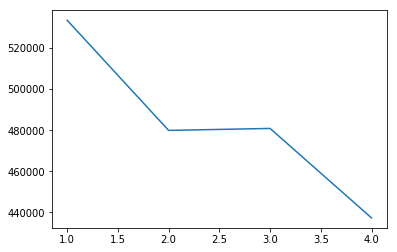

In [69]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

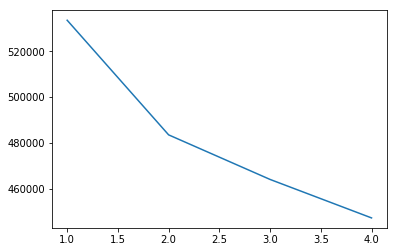

In [73]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost1)

In [11]:
km_huang = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3425, cost: 992439.0


In [12]:
fitClusters_huang #Cao

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [15]:
cust = cust_copy.reset_index()

In [16]:
clustersDf = pd.DataFrame(fitClusters_huang)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [17]:
combinedDf.head()

,pekerjaan,agama,gender,kota,cabang,age_bin,spending_bin,cluster_predicted
0,Employee,Islam,MALE,PALEMBANG,Pedro Palembang Icon,24-39,1.000.000-1.499.000,0
1,Employee,Islam,FEMALE,PALEMBANG,Pedro Palembang Icon,40-55,1.000.000-1.499.000,0
2,Employee,Other,FEMALE,PALEMBANG,Pedro Palembang Icon,24-39,500.000-999.000,0
3,Student,Islam,FEMALE,PALEMBANG,Pedro Palembang Icon,24-39,500.000-999.000,0
4,Housewife,Islam,FEMALE,BANJARMASIN,Pedro Duta Mall 2 Banjarmasin,24-39,500.000-999.000,0


In [18]:
pd.value_counts(combinedDf.cluster_predicted, normalize = True)

0    0.820631
1    0.179369
Name: cluster_predicted, dtype: float64

In [22]:
combinedDf[combinedDf['cluster_predicted']==0].value_counts()

pekerjaan     agama   gender  kota       cabang                    age_bin  spending_bin         cluster_predicted
Student       Islam   FEMALE  PALEMBANG  Pedro Palembang Icon      24-39    1.000.000-1.499.000  0                    1081
Employee      Islam   FEMALE  JAKARTA    Pedro Kota Kasablanka     24-39    1.000.000-1.499.000  0                    1036
                              PALEMBANG  Pedro Palembang Icon      24-39    1.000.000-1.499.000  0                    1012
Student       Islam   FEMALE  JAKARTA    Pedro Kota Kasablanka     24-39    1.000.000-1.499.000  0                     864
                              PEKANBARU  Pedro SKA Mall Pekanbaru  24-39    1.000.000-1.499.000  0                     798
                                                                                                                      ... 
Others        Others  FEMALE  MEDAN      Pedro Deli Park Medan     40-55    0-499.000            0                       1
                        

In [23]:
combinedDf[combinedDf['cluster_predicted']==1].value_counts()

pekerjaan     agama    gender  kota         cabang                         age_bin  spending_bin         cluster_predicted
Student       Budha    FEMALE  MEDAN        Pedro Centre Point Medan       24-39    1.000.000-1.499.000  1                    456
                       MALE    MEDAN        Pedro Centre Point Medan       24-39    1.000.000-1.499.000  1                    417
                       FEMALE  MEDAN        Pedro Centre Point Medan       24-39    500.000-999.000      1                    378
              Islam    MALE    PALEMBANG    Pedro Palembang Icon           24-39    500.000-999.000      1                    310
              Budha    MALE    JAKARTA      Pedro Central Park             24-39    500.000-999.000      1                    292
                                                                                                                             ... 
Entrepreneur  Katolik  MALE    BANJARMASIN  Pedro Duta Mall 2 Banjarmasin  56-74    500.000-999.0

# Customer Clustering (K-Modes)

In [3]:
cust = pd.read_sql('''
select m_branch.company, no_bank, isnull(religion, '') as religion, isnull(pekerjaan, '') as pekerjaan, isnull(gender, '') as gender, payrollschema as city, DATEDIFF(year, dt_birth, '2021-11-19') as age
from v_invoiceQty
inner join m_model
on v_invoiceQty.no_model = m_model.no_model
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
inner join m_clientNew --left join buat termasuk non member
on v_invoiceQty.no_clt = m_clientNew.no_client
where nett <>0 and v_invoiceQty.note not like '%retur%' and m_branch.isActive = 'Y' and (m_branch.type = 'O' or m_branch.type = 'F') and m_branch.isDelete = 'N' and DATEDIFF(year, dt_birth, '2021-11-19') < 100
                  ''', cnxn)

In [7]:
cust.dropna()
cust['no_bank'] = cust['no_bank'].replace('', 'Cash')
cust['religion'] = cust['religion'].replace('', 'Others')
cust['pekerjaan'] = cust['pekerjaan'].replace('', 'Others')
cust['gender'] = cust['gender'].replace('', 'Others')

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [9]:
# converting age into a group
cust['age_bin'] = pd.cut(cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
cust  = cust.drop('age',axis = 1)

In [10]:
cust.head(10)

,company,no_bank,religion,pekerjaan,gender,city,age_bin
0,CK,Cash,Kristen,Employee,F,JAKARTA,30-40
1,CK,Cash,Kristen,Employee,F,MENADO,30-40
2,CK,SINARMAS,Kristen,Employee,F,JAKARTA,50-60
3,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30
4,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30
5,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30
6,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30
7,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30
8,CK,MANDIRI,Islam,Student,F,BANDUNG,20-30
9,CK,BRI,Islam,Student,F,JAKARTA,20-30


# Data Inspection

In [11]:
cust.shape

(647401, 7)

In [12]:
cust.describe()

,company,no_bank,religion,pekerjaan,gender,city,age_bin
count,647401,647401,647401,647401,647401,647401,647401
unique,3,17,8,9,3,17,9
top,CK,BCA,Islam,Employee,F,JAKARTA,20-30
freq,384169,300205,380873,222735,515446,288448,231315


In [13]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647401 entries, 0 to 647400
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   company    647401 non-null  object  
 1   no_bank    647401 non-null  object  
 2   religion   647401 non-null  object  
 3   pekerjaan  647401 non-null  object  
 4   gender     647401 non-null  object  
 5   city       647401 non-null  object  
 6   age_bin    647401 non-null  category
dtypes: category(1), object(6)
memory usage: 30.3+ MB


# Model Building

In [14]:
cust_copy = cust.copy()

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cust = cust.apply(le.fit_transform)
cust.head()

,company,no_bank,religion,pekerjaan,gender,city,age_bin
0,0,7,5,0,0,6,2
1,0,7,5,0,0,9,2
2,0,15,5,0,0,6,4
3,0,9,2,8,0,6,1
4,0,9,2,8,0,6,1


In [16]:
# Importing Libraries
from kmodes.kmodes import KModes

In [17]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2208616.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2052193.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38234, cost: 1925770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38075, cost: 1867034.0


In [29]:
cost1 = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmode.fit_predict(cust)
    cost1.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2856016.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 105167, cost: 2738609.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 204193, cost: 2467073.0
Run 1, iteration: 2/100, moves: 7171, cost: 2467072.0
Run 1, iteration: 3/100, moves: 0, cost: 2467072.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 243898, cost: 2326302.0
Run 1, iteration: 2/100, moves: 0, cost: 2326302.0


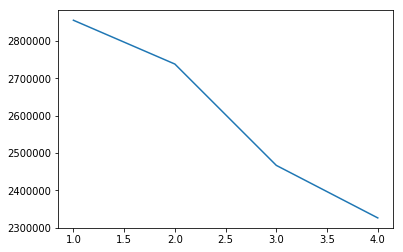

In [30]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost1)

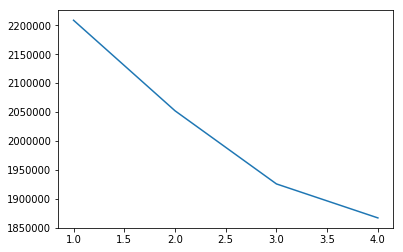

In [32]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [19]:
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 38234, cost: 1925770.0


In [20]:
fitClusters_cao

array([0, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
cust = cust_copy.reset_index()

In [22]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [23]:
combinedDf.head()

,company,no_bank,religion,pekerjaan,gender,city,age_bin,cluster_predicted
0,CK,Cash,Kristen,Employee,F,JAKARTA,30-40,0
1,CK,Cash,Kristen,Employee,F,MENADO,30-40,1
2,CK,SINARMAS,Kristen,Employee,F,JAKARTA,50-60,0
3,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30,0
4,CK,MANDIRI,Islam,Student,F,JAKARTA,20-30,0


In [24]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

In [25]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467161 entries, 0 to 647400
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   company            467161 non-null  object  
 1   no_bank            467161 non-null  object  
 2   religion           467161 non-null  object  
 3   pekerjaan          467161 non-null  object  
 4   gender             467161 non-null  object  
 5   city               467161 non-null  object  
 6   age_bin            467161 non-null  category
 7   cluster_predicted  467161 non-null  uint16  
dtypes: category(1), object(6), uint16(1)
memory usage: 26.3+ MB


In [25]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87675 entries, 1 to 647399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            87675 non-null  object  
 1   no_bank            87675 non-null  object  
 2   religion           87675 non-null  object  
 3   pekerjaan          87675 non-null  object  
 4   gender             87675 non-null  object  
 5   city               87675 non-null  object  
 6   age_bin            87675 non-null  category
 7   cluster_predicted  87675 non-null  uint16  
dtypes: category(1), object(6), uint16(1)
memory usage: 4.9+ MB


In [27]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92565 entries, 30 to 647397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   company            92565 non-null  object  
 1   no_bank            92565 non-null  object  
 2   religion           92565 non-null  object  
 3   pekerjaan          92565 non-null  object  
 4   gender             92565 non-null  object  
 5   city               92565 non-null  object  
 6   age_bin            92565 non-null  category
 7   cluster_predicted  92565 non-null  uint16  
dtypes: category(1), object(6), uint16(1)
memory usage: 5.2+ MB


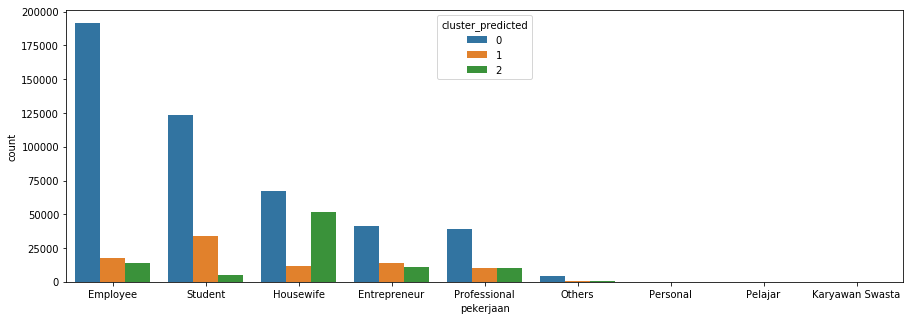

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['pekerjaan'],order=combinedDf['pekerjaan'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

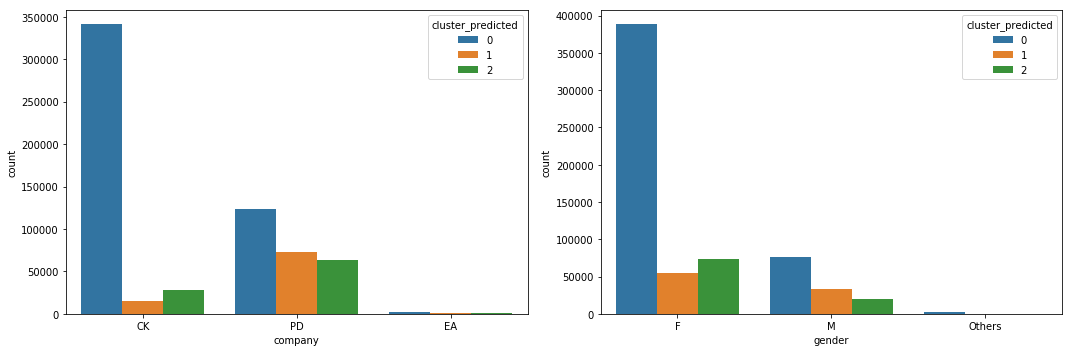

In [33]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['company'],order=combinedDf['company'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['gender'],order=combinedDf['gender'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

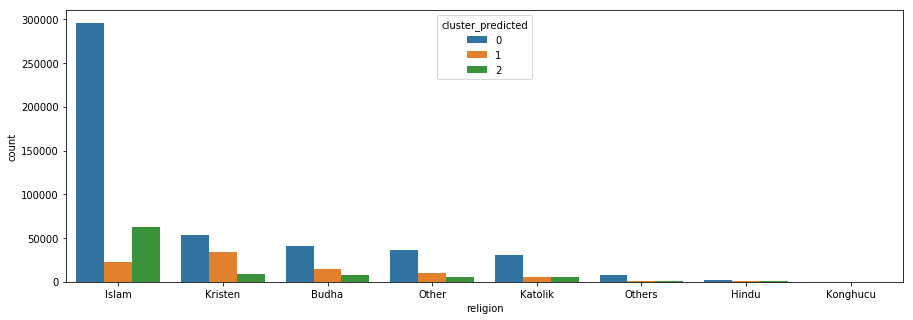

In [31]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['religion'],order=combinedDf['religion'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

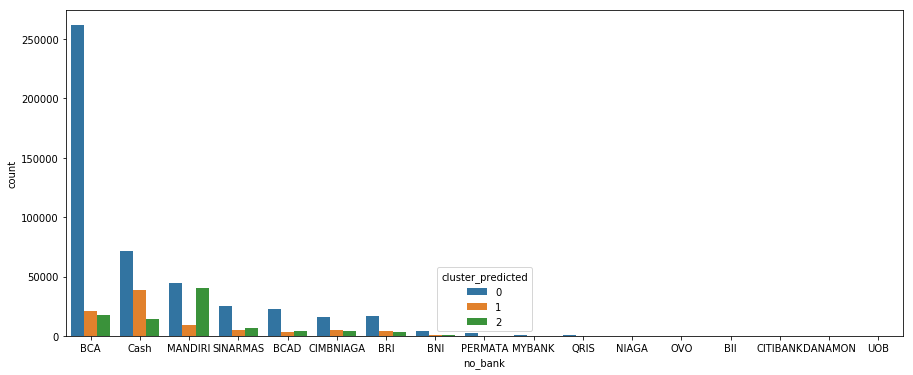

In [40]:
plt.subplots(figsize = (15,6))
sns.countplot(x=combinedDf['no_bank'],order=combinedDf['no_bank'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

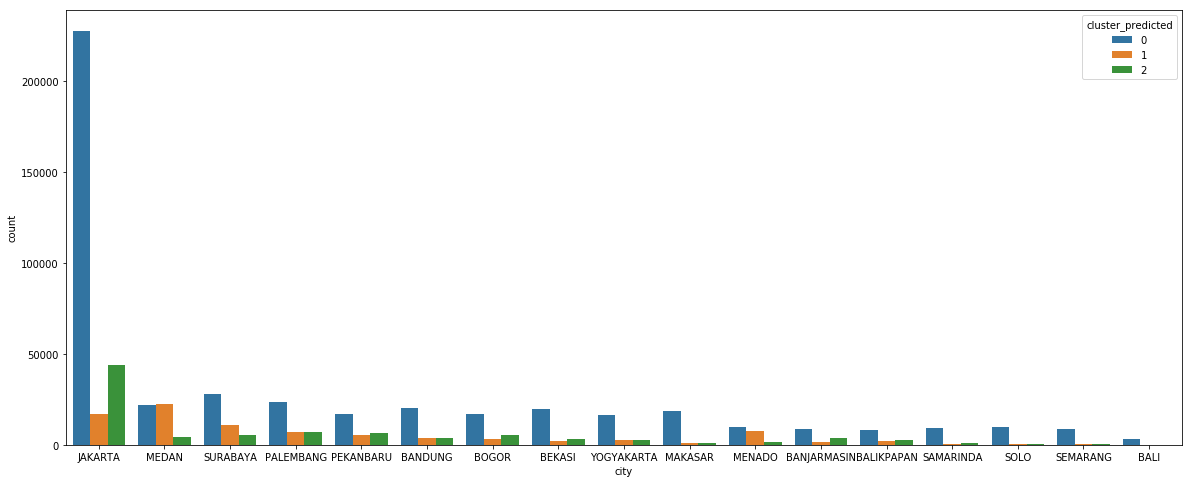

In [38]:
plt.subplots(figsize = (20,8))
sns.countplot(x=combinedDf['city'],order=combinedDf['city'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

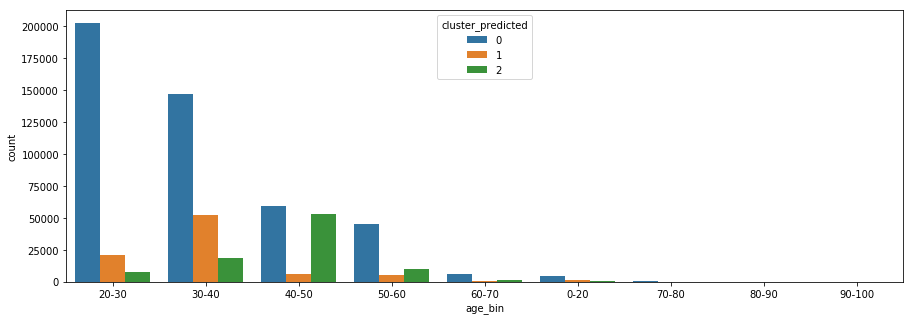

In [39]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

# Analisis Tren

In [12]:
# Analisis Gender

vip = pd.read_sql('''
select branchname, type, convert(date, v_invoiceQty.dt_inv) as tanggal, isnull(gender,'') as gender, count(isnull(gender,'')) as Jumlah
from v_invoiceQty
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
inner join m_clientNew
on v_invoiceQty.no_clt = m_clientNew.no_client
where v_invoiceQty.note NOT LIKE '%retur%' and nett<>0 and (m_branch.type = 'F' or m_branch.type = 'O')
group by branchname, convert(date, v_invoiceQty.dt_inv), type, gender
order by convert(date, v_invoiceQty.dt_inv) asc
                  ''', cnxn)

In [16]:
vip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150084 entries, 0 to 150083
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   branchname  150084 non-null  object        
 1   type        150084 non-null  object        
 2   tanggal     150084 non-null  datetime64[ns]
 3   gender      150084 non-null  object        
 4   Jumlah      150084 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 5.7+ MB


In [73]:
vip = vip.set_index(pd.to_datetime(vip['Tanggal']))

In [9]:
vip = vip.dropna()

In [14]:
vip['tanggal']=pd.to_datetime(vip['tanggal'])

In [18]:
vip.head()

,branchname,type,tanggal,gender,Jumlah
0,CK Grand Indonesia,O,2016-06-07,F,2
1,CK Central Park,O,2016-06-07,F,1
2,CK Senayan City,O,2016-06-08,F,1
3,CK Mal Puri Indah,O,2016-06-09,F,1
4,CK Summarecon Mal Bekasi,O,2016-06-09,F,4


In [17]:
vip['gender'] = vip['gender'].replace('', 'Others')

In [141]:
vip = vip[['branchName', 'MonthYear_value', 'Jumlah_VIP']].groupby(['branchName', 'MonthYear_value']).sum().reset_index()
vip

,company,MonthYear_value,Jumlah_VIP
0,CK,2016-06,4903
1,CK,2016-07,3945
2,CK,2016-08,3675
3,CK,2016-09,2715
4,CK,2016-10,2912
...,...,...,...
157,PD,2021-07,932
158,PD,2021-08,1594
159,PD,2021-09,4002
160,PD,2021-10,6215


In [4]:
cust.to_csv(r'C:\Users\Izzuddin\KCG\trial.csv', index = False)

# Best Seller

In [20]:
# Analisis Gender

cust = pd.read_sql('''
select m_clientNew.company, type, branchname, convert(date, v_invoiceQty.dt_inv) as tanggal, DATEDIFF(year, dt_birth, '2021-11-19') as age, count(DATEDIFF(year, dt_birth, '2021-11-19')) as Jumlah
from v_invoiceQty
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
inner join m_clientNew --left join buat termasuk non member
on v_invoiceQty.no_clt = m_clientNew.no_client
where nett <>0 and v_invoiceQty.note not like '%retur%' and m_branch.isActive = 'Y' and (m_branch.type = 'O' or m_branch.type = 'F') and m_branch.isDelete = 'N' and DATEDIFF(year, dt_birth, '2021-11-19') > 7 and DATEDIFF(year, dt_birth, '2021-11-19') < 100
group by convert(date, v_invoiceQty.dt_inv), m_clientNew.company, type, branchname, DATEDIFF(year, dt_birth, '2021-11-19')
order by convert(date, v_invoiceQty.dt_inv) asc
                  ''', cnxn)

In [21]:
cust['kelompok_umur'] = pd.cut(cust['age'], [8, 23, 39, 55, 74, 100], 
                              labels=['Gen Z (8-23)', 'Milenial (24-39)', 'Gen X (40-55)', 'Baby Boomer (56-74)','Pre-Boomer (>75)'])
cust  = cust.drop('age',axis = 1)

In [22]:
cust.head(10)

,company,type,branchname,tanggal,Jumlah,kelompok_umur
0,CK,O,CK Central Park,2016-06-07,1,Milenial (24-39)
1,CK,O,CK Grand Indonesia,2016-06-07,2,Milenial (24-39)
2,CK,O,CK Senayan City,2016-06-08,1,Milenial (24-39)
3,CK,O,CK Mal Puri Indah,2016-06-09,1,Milenial (24-39)
4,CK,O,CK Margo City,2016-06-09,2,Milenial (24-39)
5,CK,O,CK Summarecon Mal Bekasi,2016-06-09,4,Milenial (24-39)
6,CK,O,CK Grand Indonesia,2016-06-10,3,Gen X (40-55)
7,CK,O,CK Summarecon Mal Serpong,2016-06-10,3,Gen X (40-55)
8,CK,O,CK Margo City,2016-06-10,3,Milenial (24-39)
9,CK,O,CK Kota Kasablanka,2016-06-11,1,Milenial (24-39)


In [24]:
cust.to_csv(r'C:\Users\Izzuddin\KCG\vip_umur.csv', index = False)

In [25]:
#Analisis pekerjaan

cust = pd.read_sql('''
select m_branch.company, type, branchname, convert(date, v_invoiceQty.dt_inv) as tanggal, isnull(pekerjaan,'') as pekerjaan, count(*) as Total
from v_invoiceQty
inner join m_clientNew
on v_invoiceQty.no_clt = m_clientNew.no_client
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
where nett <>0 and v_invoiceQty.note not like '%retur%' and m_branch.isActive = 'Y' and (m_branch.type = 'O' or m_branch.type = 'F') and m_branch.isDelete = 'N' and DATEDIFF(year, dt_birth, '2021-11-19') < 100 and DATEDIFF(year, dt_birth, '2021-11-19') > 6
group by m_branch.company, type, branchname, convert(date, v_invoiceQty.dt_inv), isnull(pekerjaan,'')
having count(*) > 1
order by convert(date, v_invoiceQty.dt_inv) asc
                  ''', cnxn)

In [26]:
cust.head(10)

,company,type,branchname,tanggal,pekerjaan,Total
0,CK,O,CK Grand Indonesia,2016-06-07,Employee,2
1,CK,O,CK Margo City,2016-06-09,Housewife,2
2,CK,O,CK Summarecon Mal Bekasi,2016-06-09,,4
3,CK,O,CK Margo City,2016-06-10,Employee,3
4,CK,O,CK Grand Indonesia,2016-06-10,Housewife,3
5,CK,O,CK Summarecon Mal Serpong,2016-06-10,Employee,3
6,CK,O,CK Grand Indonesia,2016-06-11,Housewife,2
7,CK,O,CK Margo City,2016-06-11,Student,2
8,CK,O,CK Summarecon Mal Bekasi,2016-06-11,Housewife,2
9,CK,O,CK Central Park,2016-06-12,Student,2


In [27]:
cust['pekerjaan'] = cust['pekerjaan'].replace('', 'Prefer Not Mention')

In [28]:
cust.head(10)

,company,type,branchname,tanggal,pekerjaan,Total
0,CK,O,CK Grand Indonesia,2016-06-07,Employee,2
1,CK,O,CK Margo City,2016-06-09,Housewife,2
2,CK,O,CK Summarecon Mal Bekasi,2016-06-09,Prefer Not Mention,4
3,CK,O,CK Margo City,2016-06-10,Employee,3
4,CK,O,CK Grand Indonesia,2016-06-10,Housewife,3
5,CK,O,CK Summarecon Mal Serpong,2016-06-10,Employee,3
6,CK,O,CK Grand Indonesia,2016-06-11,Housewife,2
7,CK,O,CK Margo City,2016-06-11,Student,2
8,CK,O,CK Summarecon Mal Bekasi,2016-06-11,Housewife,2
9,CK,O,CK Central Park,2016-06-12,Student,2


In [29]:
cust.to_csv(r'C:\Users\Izzuddin\KCG\vip_pekerjaan.csv', index = False)

In [3]:
# Analisis VIP vs. Reguler

cust = pd.read_sql('''
select convert(date, v_invoiceQty.dt_inv) as tanggal, no_clt, count(no_clt) as total
from v_invoiceQty
where nett<>0 and note not like '%retur%'
group by convert(date, v_invoiceQty.dt_inv), no_clt
order by convert(date, v_invoiceQty.dt_inv)
                  ''', cnxn)

In [4]:
cust.head()

,tanggal,no_clt,total
0,2016-01-01,518980,1
1,2016-01-01,530644,2
2,2016-01-01,531440,1
3,2016-01-01,532126,3
4,2016-01-01,532336,1


In [14]:
h = []

for i in range(len(cust['no_clt'])):
    if cust['no_clt'][i] != '':
        h.append('VIP')
    else:
        h.append('Regular')

In [16]:
cust['no_clt'] = h

In [17]:
cust.head()

,tanggal,no_clt,total
0,2016-01-01,VIP,1
1,2016-01-01,VIP,2
2,2016-01-01,VIP,1
3,2016-01-01,VIP,3
4,2016-01-01,VIP,1


In [18]:
cust.to_csv(r'C:\Users\Izzuddin\KCG\vip_regular.csv', index = False)

In [66]:
# Analisis vip vs reguler per toko
cust = pd.read_sql('''
select convert(date, v_invoiceQty.dt_inv) as tanggal, branchName, no_clt, count(no_clt) as total
from v_invoiceQty
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
where nett<>0 and note not like '%retur%'
group by convert(date, v_invoiceQty.dt_inv), no_clt, branchName
order by convert(date, v_invoiceQty.dt_inv)
                  ''', cnxn)

In [67]:
h = []

for i in range(len(cust['no_clt'])):
    if cust['no_clt'][i] != '':
        h.append('VIP')
    else:
        h.append('Regular')

In [68]:
cust['no_clt'] = h

In [69]:
cust.head()

,tanggal,branchName,no_clt,total
0,2016-01-01,CK Cibubur Junction,Regular,16
1,2016-01-01,CK Grand Metropolitan Bekasi,Regular,26
2,2016-01-01,CK Mall Pondok Indah,Regular,50
3,2016-01-01,CK Palembang Icon,Regular,57
4,2016-01-01,CK Plaza Senayan,Regular,26


In [70]:
cust.to_csv(r'C:\Users\Izzuddin\KCG\vip_vstoko.csv', index = False)

In [4]:
import pandas as pd

In [5]:
# Analisis loyal per toko
cust = pd.read_sql('''
select branchName, no_clt, DATEDIFF(day, max(v_invoiceQty.dt_inv), '2021-11-12') as recency, count(distinct(v_invoiceQty.no_inv)) as frequency
from v_invoiceQty
inner join m_branch
on v_invoiceQty.no_branch = m_branch.idbranch
inner join m_clientNew
on v_invoiceQty.no_clt = m_clientNew.no_client
where nett <>0 and v_invoiceQty.note not like '%retur%' and m_branch.isActive = 'Y' and (m_branch.type = 'O' or m_branch.type = 'F') and m_branch.isDelete = 'N'
group by branchName, no_clt
                  ''', cnxn)

In [5]:
cust.head()

,branchName,no_clt,recency,frequency
0,CK Central Park,123456,1622,1
1,CK Grand Indonesia,123456,154,2
2,CK Mall Alam Sutera,123456,61,1
3,Pedro SKA Mall Pekanbaru,123456,1646,1
4,CK Lippo Mall Puri,CK000009,940,1


In [6]:
cust.describe()

,recency,frequency
count,233444.000000,233444.000000
mean,651.011960,2.046358
std,491.741155,4.905861
min,4.000000,1.000000
25%,208.000000,1.000000
50%,626.000000,1.000000
75%,1025.000000,2.000000
max,1984.000000,868.000000


In [6]:
cust["recency_score"] = pd.qcut(cust['recency'], 5, labels=[5, 4, 3, 2, 1])
cust["frequency_score"] = pd.qcut(cust["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

    # segment naming
cust['rfm_segment'] = cust['recency_score'].astype(str) + cust['frequency_score'].astype(str)

seg_map = {
        r'[1-2][1-2]': 'hibernating',
        r'[1-2][3-4]': 'at_risk',
        r'[1-2]5': 'cant_loose',
        r'3[1-2]': 'about_to_sleep',
        r'33': 'need_attention',
        r'[3-4][4-5]': 'loyal_customers',
        r'41': 'promising',
        r'51': 'new_customers',
        r'[4-5][2-3]': 'potential_loyalists',
        r'5[4-5]': 'champions'
    }

cust['rfm_segment'] = cust['rfm_segment'].replace(seg_map, regex=True)

In [11]:
cust.head()

,branchName,no_clt,recency,frequency,recency_score,frequency_score,rfm_segment
0,CK Central Park,123456,1622,1,1,1,hibernating
1,CK Grand Indonesia,123456,154,2,5,4,champions
2,CK Mall Alam Sutera,123456,61,1,5,1,new_customers
3,Pedro SKA Mall Pekanbaru,123456,1646,1,1,1,hibernating
4,CK Lippo Mall Puri,CK000009,940,1,2,1,hibernating


In [7]:
a = cust.loc[cust['rfm_segment'].isin(['potential_loyalists', 'cant_loose', 'loyal_customers', 'champions'])].reset_index()
b = cust.loc[cust['rfm_segment'].isin(['hibernating', 'at_risk', 'about_to_sleep'])].reset_index()

In [29]:
a.head()

,index,branchName,no_clt,recency,frequency,recency_score,frequency_score,rfm_segment
0,1,CK Grand Indonesia,123456,154,2,5,4,champions
1,15,CK Palembang Icon,CK000043,1312,3,1,5,cant_loose
2,17,CK PIK Avenue,CK000047,677,2,3,4,loyal_customers
3,20,CK Botani Square,CK000058,135,7,5,5,champions
4,22,CK Centre Point Medan,CK000069,713,17,3,5,loyal_customers


In [30]:
b.head()

,index,branchName,no_clt,recency,frequency,recency_score,frequency_score,rfm_segment
0,0,CK Central Park,123456,1622,1,1,1,hibernating
1,3,Pedro SKA Mall Pekanbaru,123456,1646,1,1,1,hibernating
2,4,CK Lippo Mall Puri,CK000009,940,1,2,1,hibernating
3,5,CK Manado Town Square,CK000015,1377,2,1,4,at_risk
4,6,CK Kota Kasablanka,CK000018,1881,1,1,1,hibernating


In [8]:
for i in range(len(a['rfm_segment'])):
    if a['rfm_segment'][i] != '':
        a['rfm_segment'][i] = 'loyal'

In [9]:
for i in range(len(b['rfm_segment'])):
    if b['rfm_segment'][i] != '':
        b['rfm_segment'][i] = 'unloyal'

In [10]:
df = a.append(b, ignore_index = True)

In [11]:
df.head()

,index,branchName,no_clt,recency,frequency,recency_score,frequency_score,rfm_segment
0,4,CK Mal Ciputra Cibubur,CK000013,41,7,5,5,loyal
1,5,CK Trans Studio Mall Cibubur,CK000013,317,4,4,5,loyal
2,7,CK Summarecon Mal Serpong,CK000019,852,4,2,5,loyal
3,9,CK Mall Kelapa Gading 3,CK000024,93,3,5,5,loyal
4,10,CK Senayan City,CK000026,87,2,5,4,loyal


In [34]:
df.to_csv(r'C:\Users\Izzuddin\KCG\vip_loyaltoko.csv', index = False)

# Classification (PEDRO)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Izzuddin\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Checking and Inspecting Data

In [56]:
df = pd.read_sql('''
select pekerjaan, religion as agama, gender, datediff(year, birthdate, '2022-01-01') as age, branch.city as kota, branch.branchname as cabang, sales.price as spending
from sales
inner join branch
on sales.no_branch = branch.no_branch
inner join customer
on sales.no_client = customer.no_client
where company = 'PD'
''', cnxn)

In [4]:
df.nunique()

pekerjaan      7
agama          8
gender         2
age           70
kota          13
cabang        35
spending     210
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279709 entries, 0 to 279708
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   pekerjaan  279630 non-null  object 
 1   agama      279630 non-null  object 
 2   gender     279709 non-null  object 
 3   age        279703 non-null  float64
 4   kota       279709 non-null  object 
 5   cabang     279709 non-null  object 
 6   spending   279709 non-null  float64
dtypes: float64(2), object(5)
memory usage: 14.9+ MB


In [6]:
df.isnull().sum()

pekerjaan    79
agama        79
gender        0
age           6
kota          0
cabang        0
spending      0
dtype: int64

In [7]:
df.describe()

,age,spending
count,279703.000000,2.797090e+05
mean,36.275653,1.098648e+06
std,9.929656,4.422325e+05
min,14.000000,4.900000e+04
25%,29.000000,8.490000e+05
50%,34.000000,1.149000e+06
75%,42.000000,1.399000e+06
max,122.000000,2.499000e+06


In [46]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279630 entries, 0 to 279708
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   pekerjaan  279630 non-null  object 
 1   agama      279630 non-null  object 
 2   gender     279630 non-null  object 
 3   age        279630 non-null  float64
 4   kota       279630 non-null  object 
 5   cabang     279630 non-null  object 
 6   spending   279630 non-null  float64
dtypes: float64(2), object(5)
memory usage: 17.1+ MB


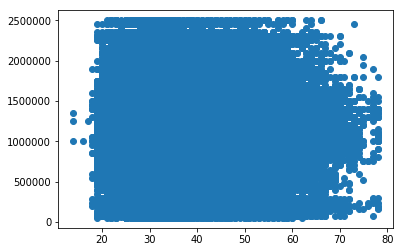

In [26]:
plt.scatter(df['age'], df['spending'])

In [58]:
df = df.loc[df['age'] < 80]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279362 entries, 0 to 279708
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   pekerjaan  279362 non-null  object 
 1   agama      279362 non-null  object 
 2   gender     279362 non-null  object 
 3   age        279362 non-null  float64
 4   kota       279362 non-null  object 
 5   cabang     279362 non-null  object 
 6   spending   279362 non-null  float64
dtypes: float64(2), object(5)
memory usage: 17.1+ MB


In [57]:
df = df.dropna()
df['agama'] = df['agama'].replace('', 'Others')
df['pekerjaan'] = df['pekerjaan'].replace('', 'Others')
df['gender'] = df['gender'].replace('', 'Others')

## Label Encoding

In [59]:
# process categorical data
df1 = df[['pekerjaan', 'agama', 'gender', 'kota', 'cabang']]
for var in df1:
    cat_list ='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    data1 = df.join(cat_list)
    df = data1

In [64]:
df2.head()

,age,spending,pekerjaan_Employee,pekerjaan_Entrepreneur,pekerjaan_Housewife,pekerjaan_Karyawan Swasta,pekerjaan_Others,pekerjaan_Professional,pekerjaan_Student,agama_Budha,...,cabang_Pedro Paris Van Java,cabang_Pedro Pentacity Balikpapan,cabang_Pedro Plaza Ambarukmo,cabang_Pedro Plaza Indonesia,cabang_Pedro SKA Mall Pekanbaru,cabang_Pedro Senayan City,cabang_Pedro Summarecon Mal Bekasi,cabang_Pedro Summarecon Mal Serpong,cabang_Pedro Sun Plaza Medan,cabang_Pedro Tunjungan Plaza Surabaya
0,61.0,1449000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,61.0,1199000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61.0,1499000.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,43.0,1499000.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42.0,639000.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# remove categorical data
cat_vars = ['pekerjaan', 'agama', 'gender', 'kota', 'cabang']
data_vars = df.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

df2 = df[to_keep]

In [62]:
df2.columns.values

array(['age', 'spending', 'pekerjaan_Employee', 'pekerjaan_Entrepreneur',
       'pekerjaan_Housewife', 'pekerjaan_Karyawan Swasta',
       'pekerjaan_Others', 'pekerjaan_Professional', 'pekerjaan_Student',
       'agama_Budha', 'agama_Hindu', 'agama_Islam', 'agama_Katolik',
       'agama_Konghucu', 'agama_Kristen', 'agama_Other', 'agama_Others',
       'gender_FEMALE', 'gender_MALE', 'kota_BALI', 'kota_BALIKPAPAN',
       'kota_BANDUNG', 'kota_BANJARMASIN', 'kota_BEKASI', 'kota_BOGOR',
       'kota_JAKARTA', 'kota_MEDAN', 'kota_MENADO', 'kota_PALEMBANG',
       'kota_PEKANBARU', 'kota_SURABAYA', 'kota_YOGYAKARTA',
       'cabang_Pedro 23 Paskal Bandung',
       'cabang_Pedro AEON Mall BSD City',
       'cabang_Pedro Baywalk Pluit Mall', 'cabang_Pedro Beachwalk Bali',
       'cabang_Pedro Botani Square', 'cabang_Pedro Central Park',
       'cabang_Pedro Centre Point Medan', 'cabang_Pedro Ciputra World',
       'cabang_Pedro Deli Park Medan',
       'cabang_Pedro Duta Mall 2 Banjarmasin

In [115]:
df2.tail()

,age,pekerjaan_Employee,pekerjaan_Entrepreneur,pekerjaan_Housewife,pekerjaan_Karyawan Swasta,pekerjaan_Professional,pekerjaan_Student,religion_Budha,religion_Hindu,religion_Islam,...,branchname_Pedro Paris Van Java,branchname_Pedro Pentacity Balikpapan,branchname_Pedro Plaza Ambarukmo,branchname_Pedro SKA Mall Pekanbaru,branchname_Pedro Senayan City,branchname_Pedro Summarecon Mal Bekasi,branchname_Pedro Summarecon Mal Serpong,branchname_Pedro Sun Plaza Medan,branchname_Pedro Tunjungan Plaza Surabaya,price_bin
136824,43,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,< 1149000
136825,53,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,> 1149000
136826,23,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,> 1149000
136827,45,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,> 1149000
136828,42,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,< 1149000


In [29]:
#label encoding
df0 = df[['pekerjaan', 'agama', 'gender', 'age', 'kota', 'cabang', 'spending']]
df1 = df[['pekerjaan', 'agama', 'gender', 'kota', 'cabang']]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df1 = df1.apply(le.fit_transform)

In [30]:
df0['pekerjaan'] = df1['pekerjaan']
df0['agama'] = df1['agama']
df0['gender'] = df1['gender']
df0['kota'] = df1['kota']
df0['cabang'] = df1['cabang']
df0.head()

,pekerjaan,agama,gender,age,kota,cabang,spending
0,1,3,0,61.0,9,24,1449000.0
1,1,3,0,61.0,9,24,1199000.0
2,1,3,0,61.0,9,24,1499000.0
3,5,3,0,43.0,9,24,1499000.0
4,3,3,0,42.0,2,0,639000.0


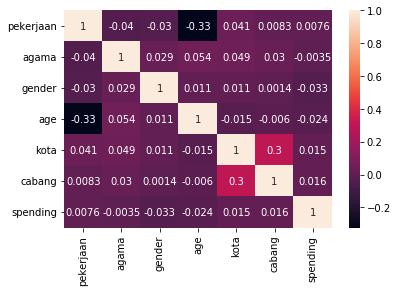

In [31]:
sns.heatmap(data=df0.corr(), annot=True)

In [ ]:
sns.pairplot(df2)

## Model

In [5]:
yow = df[['age', 'price']]

In [12]:
yow.head()

,age,price
0,61.0,1449000
1,61.0,1199000
2,61.0,1499000
3,43.0,1499000
4,42.0,639000


In [36]:
#split data
import sklearn
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df0, test_size=0.2, random_state=42)

In [33]:
#Prepare data: memisahakn target fitur
train_label = train_data['spending']
train_feature = train_data.drop(['spending'], axis=1)
test_label = test_data['spending']
test_feature = test_data.drop(['spending'], axis = 1)

In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X=train_feature, y=train_label)

LinearRegression()

In [16]:
from sklearn.metrics import r2_score
accuracy_score = lr_model.score(test_feature, test_label) # same as r2_score(test_label, salary_pred)
print(f'Accuracy: {accuracy_score * 100:.2f}')

Accuracy: -0.02


In [65]:
#price bin
# converting age into a group
df2['price_bin'] = pd.cut(df2['spending'], [0, 1149000, 2499000], 
                              labels=['< 1149000', '> 1149000'])
df2  = df2.drop('spending',axis = 1)

In [76]:
#logistic
data_vars = df2.columns.values.tolist()
y = ['price_bin']
X = [i for i in data_vars if i not in y]

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(df2[X], df2[y], test_size=0.2, random_state=0)

'''X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)'''

'X_train = preprocessing.scale(X_train)\nX_test = preprocessing.scale(X_test)'

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [78]:
model_score = logreg.score(X_test, y_test)
print('Model Accuracy:', model_score)

Model Accuracy: 0.5326544126859127


In [71]:
y_pred = logreg.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[14775 13867]
 [12215 15016]]


In [99]:
df.head()

,pekerjaan,religion,gender,age,city,branchname,price
0,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1449000
1,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1199000
2,Employee,Islam,FEMALE,61.0,PALEMBANG,Pedro Palembang Icon,1499000
3,Professional,Islam,FEMALE,43.0,PALEMBANG,Pedro Palembang Icon,1499000
4,Housewife,Islam,FEMALE,42.0,BANDUNG,Pedro 23 Paskal Bandung,639000


In [79]:
X_test

,age,pekerjaan_Employee,pekerjaan_Entrepreneur,pekerjaan_Housewife,pekerjaan_Karyawan Swasta,pekerjaan_Others,pekerjaan_Professional,pekerjaan_Student,agama_Budha,agama_Hindu,...,cabang_Pedro Paris Van Java,cabang_Pedro Pentacity Balikpapan,cabang_Pedro Plaza Ambarukmo,cabang_Pedro Plaza Indonesia,cabang_Pedro SKA Mall Pekanbaru,cabang_Pedro Senayan City,cabang_Pedro Summarecon Mal Bekasi,cabang_Pedro Summarecon Mal Serpong,cabang_Pedro Sun Plaza Medan,cabang_Pedro Tunjungan Plaza Surabaya
96086,42.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216666,57.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241034,42.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86977,61.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
137065,36.0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232710,59.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153685,47.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,30.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
179061,52.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_feature,train_label)

In [113]:
model_score = clf.score(test_feature, test_label)
print('Model Accuracy:', model_score)

Model Accuracy: 0.059071253995111865


# Analisis Customer Churn

In [3]:
df = pd.read_sql(
'''SELECT sales.no_client, sales.dt_inv, DATEDIFF(year, birthdate, '2021-12-23') 'age', no_group, sales.no_color, sales.no_size, sales.price, sales.discount, product_name, branchname, employee.name
from sales
inner join branch
on sales.no_branch = branch.no_branch
inner join customer
on sales.no_client=customer.no_client
inner join model
on sales.no_model = model.no_model
inner join model_detail
on sales.no_model = model_detail.article
inner join employee
on sales.nik = employee.nik
where branch.company = 'PD' and sales.no_client NOT LIKE '682%' and sales.no_client in (
select no_client
from sales
group by no_client
having count(distinct(dt_inv)) = 1
)
group by sales.no_client, DATEDIFF(year, birthdate, '2021-12-23'), no_group, sales.no_color,
sales.no_size, sales.price, sales.discount, product_name, branchname, employee.name, sales.dt_inv''', cnxn)

In [70]:
df.head()

,no_client,dt_inv,age,no_group,no_color,no_size,price,discount,product_name,branchname,name,Return
0,PD000003,2018-12-01,41,PDRSHOECARE,BLK,38,229000.0,0.0,Protective Mink Oil Dubbin,Pedro Kota Kasablanka,Ahmad Andriansyah,0
1,PD000003,2018-12-01,41,PDRSHOECARE,BLK,38,279000.0,0.0,Combination Care Foam,Pedro Kota Kasablanka,Ahmad Andriansyah,0
2,PD000003,2018-12-01,41,PWSHOES,BLK,36,1199000.0,0.0,Suede Open Toe Chunky Heels,Pedro Kota Kasablanka,Ahmad Andriansyah,0
3,PD000007,2018-11-06,43,PDRSOCK,MLT,38,199000.0,0.0,3-pack of Loafer Socks,Pedro Mall Kelapa Gading 3,Dhika Tegar Kusuma,0
4,PD000007,2018-11-06,43,PMSHOES,BLK,43,1399000.0,0.0,Asymmetrical Casual Meshed Runners,Pedro Mall Kelapa Gading 3,Dhika Tegar Kusuma,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59329 entries, 0 to 59328
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no_client     59329 non-null  object 
 1   dt_inv        59329 non-null  object 
 2   age           59329 non-null  int64  
 3   no_group      59329 non-null  object 
 4   no_color      59329 non-null  object 
 5   no_size       59329 non-null  object 
 6   price         59329 non-null  float64
 7   discount      59329 non-null  float64
 8   product_name  57871 non-null  object 
 9   branchname    59329 non-null  object 
 10  name          59329 non-null  object 
 11  Return        59329 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 5.4+ MB


In [27]:
df.describe()

,age,price,discount
count,49751.000000,4.975100e+04,49751.000000
mean,34.865470,1.115131e+06,2.303873
std,10.608491,4.580359e+05,9.858017
min,15.000000,4.900000e+04,0.000000
25%,27.000000,8.690000e+05,0.000000
50%,32.000000,1.199000e+06,0.000000
75%,41.000000,1.399000e+06,0.000000
max,121.000000,2.499000e+06,80.000000


In [59]:
df.groupby(by="no_group")["no_client"].nunique().sort_values(ascending=False)

no_group
PMSHOES        12021
PWBAGS          9131
PWSHOES         7509
PMBAGS          6906
PDRWLTS         3641
PDRSHOECARE     3045
PDRBELTS        1689
PDRSOCK         1688
PWWLTS          1277
OTHERSCK          28
PKSHOES           18
PKBAGS             4
PDRSCARF           3
PMBRACELETS        1
Name: no_client, dtype: int64

In [60]:
df.groupby(by="price")["no_client"].nunique().sort_values(ascending=False)

price
1399000.0    3865
1299000.0    3775
1499000.0    3119
999000.0     2569
899000.0     2380
             ... 
509150.0        1
441150.0        1
1539000.0       1
492150.0        1
1121150.0       1
Name: no_client, Length: 174, dtype: int64

In [62]:
print(df.groupby(by="discount")["no_client"].nunique())

discount
0.0     38615
20.0      909
30.0      658
40.0      510
50.0      387
60.0      275
70.0      192
80.0       32
Name: no_client, dtype: int64


In [63]:
df.groupby(by="product_name")["no_client"].nunique().sort_values(ascending=False)

product_name
Protective Mink Oil Dubbin            1025
Leather Clutch                         806
Combination Care Foam                  580
3-pack of No-Show Socks                541
Leather Bi-Fold Wallet with Insert     511
                                      ... 
Knotted Slide Sandals                    1
Studded Sneakers                         1
Printed Casual Sneakers                  1
Press Lock Shoulder Bag                  1
Croc-Effect Chain Organiser              1
Name: no_client, Length: 1719, dtype: int64

In [64]:
df.groupby(by="branchname")["no_client"].nunique().sort_values(ascending=False)

branchname
Pedro Central Park                2839
Pedro Palembang Icon              2588
Pedro Senayan City                2566
Pedro Kota Kasablanka             2564
Pedro Mall Kelapa Gading 3        2387
Pedro Tunjungan Plaza Surabaya    2314
Pedro SKA Mall Pekanbaru          2186
Pedro Grand Indonesia             2184
Pedro Centre Point Medan          2154
Pedro Pakuwon Mall Surabaya       1790
Pedro Summarecon Mal Serpong      1536
Pedro Botani Square               1261
Pedro Summarecon Mal Bekasi       1178
Pedro Hartono Mall Yogya          1178
Pedro Mall Pondok Indah           1170
Pedro Sun Plaza Medan             1162
Pedro Paris Van Java              1050
Pedro Manado Town Square          1048
Pedro Duta Mall 2 Banjarmasin     1000
Pedro 23 Paskal Bandung            938
Pedro PIK Avenue                   828
Pedro AEON Mall BSD City           815
Pedro Pentacity Balikpapan         760
Pedro Deli Park Medan              609
Pedro Mall Taman Anggrek           433
Pedro Ciputra 

In [65]:
df.groupby(by="name")["no_client"].nunique().sort_values(ascending=False)

name
Mely Mega Ayu               553
Aprina                      549
Hidayat                     523
Boan                        503
Annisa Latunil Khair        499
                           ... 
Dheacy Theresia Mamusung      1
Angelisa Rachel Sofines       1
Imam Fathur Ridho             1
Abdul Azis Fauzi              1
Rd Fiqri Nur Ramdhani         1
Name: no_client, Length: 446, dtype: int64

In [4]:
z = np.zeros((df.shape[0], 1), dtype=str).tolist()
Return = []
for i in range(len(z)):
    zeroes = z[i][0] + '0'
    Return.append(zeroes)
    
df = df.assign(Return=Return)

# Analisis Customer Retention

In [5]:
df1 = pd.read_sql(
'''SELECT sales.no_client, sales.dt_inv, DATEDIFF(year, birthdate, '2021-12-23') 'age', no_group, sales.no_color, sales.no_size, sales.price, sales.discount, product_name, branchname, employee.name
from sales
inner join branch
on sales.no_branch = branch.no_branch
inner join customer
on sales.no_client=customer.no_client
inner join model
on sales.no_model = model.no_model
inner join model_detail
on sales.no_model = model_detail.article
inner join employee
on sales.nik = employee.nik
where branch.company = 'PD' and sales.no_client NOT LIKE '682%' and sales.no_client in (
select no_client
from sales
group by no_client
having count(distinct(no_inv)) > 1
)
group by sales.no_client, DATEDIFF(year, birthdate, '2021-12-23'), no_group, sales.no_color,
sales.no_size, sales.price, sales.discount, product_name, branchname, employee.name, sales.dt_inv
order by dt_inv desc''', cnxn)

In [117]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178387 entries, 0 to 178386
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   no_client     178387 non-null  object 
 1   dt_inv        178387 non-null  object 
 2   age           178386 non-null  float64
 3   no_group      178387 non-null  object 
 4   no_color      178387 non-null  object 
 5   no_size       178387 non-null  object 
 6   price         178387 non-null  float64
 7   discount      178387 non-null  float64
 8   product_name  173307 non-null  object 
 9   branchname    178387 non-null  object 
 10  name          178387 non-null  object 
 11  Return        178387 non-null  object 
dtypes: float64(3), object(9)
memory usage: 16.3+ MB


In [6]:
z = np.zeros((df1.shape[0], 1), dtype=str).tolist()
Return = []
for i in range(len(z)):
    zeroes = z[i][0] + '1'
    Return.append(zeroes)
    
df1 = df1.assign(Return=Return)

### Data Set

In [124]:
retention = pd.concat([df, df1], axis = 0).reset_index()
retention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237716 entries, 0 to 237715
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         237716 non-null  int64  
 1   no_client     237716 non-null  object 
 2   dt_inv        237716 non-null  object 
 3   age           237715 non-null  float64
 4   no_group      237716 non-null  object 
 5   no_color      237716 non-null  object 
 6   no_size       237716 non-null  object 
 7   price         237716 non-null  float64
 8   discount      237716 non-null  float64
 9   product_name  231178 non-null  object 
 10  branchname    237716 non-null  object 
 11  name          237716 non-null  object 
 12  Return        237716 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 23.6+ MB


In [125]:
retention = retention.drop('index', axis=1)

In [74]:
retention.tail()

,no_client,dt_inv,age,no_group,no_color,no_size,price,discount,product_name,branchname,name,Return
237711,PD001000,2016-08-04,44.0,PDRSOCK,MLT,38,209000.0,0.0,3-pak of Mid Calf Socks,Pedro Senayan City,Rostini,1
237712,PD000336,2016-08-03,40.0,PDRSOCK,MLT,38,199000.0,0.0,None,Pedro Mall Taman Anggrek,Rian Permana,1
237713,PD000937,2016-07-18,41.0,PDRSOCK,MLT,38,139000.0,0.0,3-pack of No-Show Socks in Black & Nude,Pedro Mall Taman Anggrek,Ridwan Nurjaman,1
237714,PD000937,2016-07-18,41.0,PDRSOCK,MLT,38,199000.0,0.0,None,Pedro Mall Taman Anggrek,Ridwan Nurjaman,1
237715,PD000481,2016-07-12,64.0,PDRSOCK,MLT,38,179000.0,0.0,3-pack of No-Show Socks,Pedro Palembang Icon,Hidayat,1


In [126]:
retention['dt_inv']=pd.to_datetime(retention['dt_inv'])

In [128]:
retention['year'] = pd.DatetimeIndex(retention['dt_inv']).year

In [129]:
retention['month'] = pd.DatetimeIndex(retention['dt_inv']).month

In [123]:
retention = retention.dropna()

In [130]:
retention['Return'].value_counts()

1    178387
0     59329
Name: Return, dtype: int64

In [12]:
#Checking on how many unique values
for i in retention.columns.values.tolist():
    print('{} memiliki values unik sebanyak: {}'.format(i, df[i].nunique()))

no_client memiliki values unik sebanyak: 40435
dt_inv memiliki values unik sebanyak: 1656
age memiliki values unik sebanyak: 69
no_group memiliki values unik sebanyak: 14
no_color memiliki values unik sebanyak: 87
no_size memiliki values unik sebanyak: 38
price memiliki values unik sebanyak: 174
discount memiliki values unik sebanyak: 8
product_name memiliki values unik sebanyak: 1719
branchname memiliki values unik sebanyak: 35
name memiliki values unik sebanyak: 446
Return memiliki values unik sebanyak: 1


In [18]:
retention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99502 entries, 0 to 49750
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no_client     99502 non-null  object 
 1   dt_inv        99502 non-null  int64  
 2   age           99502 non-null  float64
 3   no_group      99502 non-null  object 
 4   no_color      99502 non-null  object 
 5   no_size       99502 non-null  object 
 6   price         99502 non-null  float64
 7   discount      99502 non-null  float64
 8   product_name  98276 non-null  object 
 9   branchname    99502 non-null  object 
 10  name          99502 non-null  object 
 11  Return        99502 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 9.9+ MB


In [14]:
df['price'].describe([0.01,0.25,0.5,0.75,0.99]).T

count    4.975100e+04
mean     1.115131e+06
std      4.580359e+05
min      4.900000e+04
1%       1.090000e+05
25%      8.690000e+05
50%      1.199000e+06
75%      1.399000e+06
99%      2.249000e+06
max      2.499000e+06
Name: price, dtype: float64

In [131]:
retention['spending_bin'] = pd.cut(retention['price'], [0, 499000, 999000, 1499000,1999999, 4999999],
                             labels=['0-499.000', '500.000-999.000', '1.000.000-1.499.000', '1.500.000-1.999.000', '> 2.000.000'])
retention  = retention.drop('price',axis = 1)

In [132]:
#Separate the df
df = retention[['month', 'year', 'age', 'no_group', 'spending_bin', 'discount', 'branchname', 'Return']]

df.head()

,month,year,age,no_group,spending_bin,discount,branchname,Return
0,12,2018,41.0,PDRSHOECARE,0-499.000,0.0,Pedro Kota Kasablanka,0
1,12,2018,41.0,PDRSHOECARE,0-499.000,0.0,Pedro Kota Kasablanka,0
2,12,2018,41.0,PWSHOES,1.000.000-1.499.000,0.0,Pedro Kota Kasablanka,0
3,11,2018,43.0,PDRSOCK,0-499.000,0.0,Pedro Mall Kelapa Gading 3,0
4,11,2018,43.0,PMSHOES,1.000.000-1.499.000,0.0,Pedro Mall Kelapa Gading 3,0


In [133]:
retention0 = df[['no_group', 'spending_bin', 'branchname']]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
retention1 = retention0.apply(le.fit_transform)

In [134]:
df['no_group'] = retention1['no_group']
df['spending_bin'] = retention1['spending_bin']
df['branchname'] = retention1['branchname']
df.head()

,month,year,age,no_group,spending_bin,discount,branchname,Return
0,12,2018,41.0,3,0,0.0,13,0
1,12,2018,41.0,3,0,0.0,13,0
2,12,2018,41.0,12,1,0.0,13,0
3,11,2018,43.0,4,0,0.0,15,0
4,11,2018,43.0,10,1,0.0,15,0


In [155]:
retention['branchname'].sort_values().unique()

array(['Pedro 23 Paskal Bandung', 'Pedro AEON Mall BSD City',
       'Pedro Baywalk Pluit Mall', 'Pedro Beachwalk Bali',
       'Pedro Botani Square', 'Pedro Central Park',
       'Pedro Centre Point Medan', 'Pedro Ciputra World',
       'Pedro Deli Park Medan', 'Pedro Duta Mall 2 Banjarmasin',
       'Pedro Grand City Surabaya', 'Pedro Grand Indonesia',
       'Pedro Hartono Mall Yogya', 'Pedro Kota Kasablanka',
       'Pedro Mall Alam Sutera', 'Pedro Mall Kelapa Gading 3',
       'Pedro Mall Pondok Indah', 'Pedro Mall Taman Anggrek',
       'Pedro Manado Town Square', 'Pedro Margo City', 'Pedro Online',
       'Pedro PIK Avenue', 'Pedro Pacific Place',
       'Pedro Pakuwon Mall Surabaya', 'Pedro Palembang Icon',
       'Pedro Paris Van Java', 'Pedro Pentacity Balikpapan',
       'Pedro Plaza Ambarukmo', 'Pedro Plaza Indonesia',
       'Pedro SKA Mall Pekanbaru', 'Pedro Senayan City',
       'Pedro Summarecon Mal Bekasi', 'Pedro Summarecon Mal Serpong',
       'Pedro Sun Plaza Medan'

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237716 entries, 0 to 237715
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   month         237716 non-null  int64  
 1   year          237716 non-null  int64  
 2   age           237715 non-null  float64
 3   no_group      237716 non-null  int32  
 4   spending_bin  237716 non-null  int32  
 5   discount      237716 non-null  float64
 6   branchname    237716 non-null  int32  
 7   Return        237716 non-null  object 
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 11.8+ MB


In [146]:
df['age'].describe([0.01, 0.25, 0.5, 0.75, 0.99]).T

count    237715.000000
mean         35.094571
std          10.008620
min          13.000000
1%           20.000000
25%          28.000000
50%          33.000000
75%          41.000000
99%          62.000000
max         121.000000
Name: age, dtype: float64

In [135]:
#Modeling
##Prepare
data_vars = df.columns.values.tolist()
y = ['Return']
X = [i for i in data_vars if i not in y]

In [31]:
#Shuffle dataframe
from sklearn.utils import shuffle
df_shuffled = shuffle(df)

In [136]:
##Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X], df[y], test_size=0.3, random_state=0)

In [140]:
##Train
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf_clf = RandomForestClassifier(criterion='entropy', random_state=0)
rf_clf.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [43]:
print(rf_clf.predict([[6, 2022, 25, 12, 2, 0, 13]]))

['1']


In [26]:
import pickle
with open('model','wb') as r:
    pickle.dump(rf_clf,r)

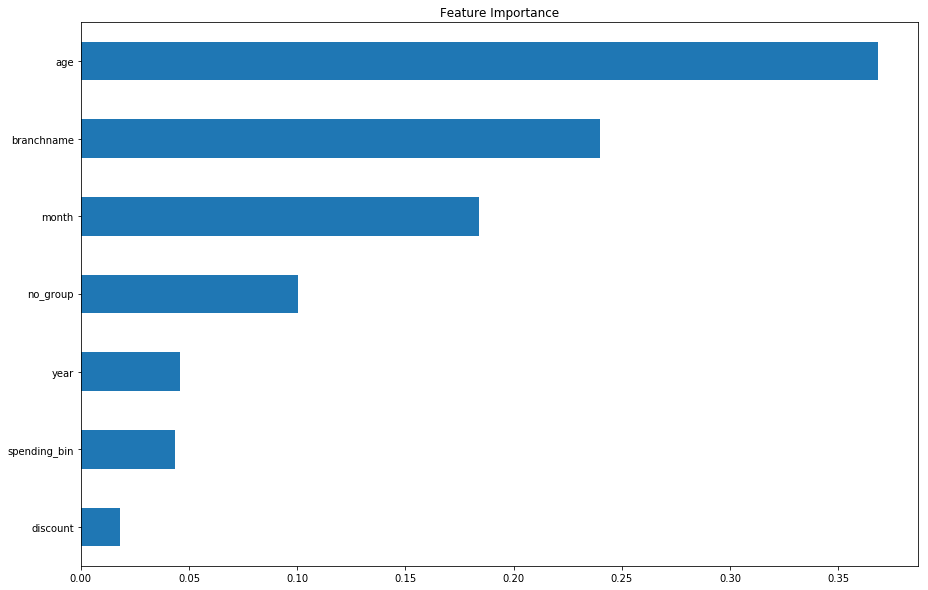

In [24]:
X_ = np.array(X)
importance_scores = rf_clf.feature_importances_
indices = np.argsort(importance_scores)

plt.figure(figsize=(15, 10))
feature_importances = pd.Series(rf_clf.feature_importances_, index=X)
feature_importances.nlargest(20).sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

In [44]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.9184602930362186
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.90      0.76      0.82     40575
           1       0.92      0.97      0.95    121248

    accuracy                           0.92    161823
   macro avg       0.91      0.87      0.89    161823
weighted avg       0.92      0.92      0.92    161823

Confussion Matrix ------------------------------------
[[ 30773   9802]
 [  3393 117855]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.6902413703607578
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.29      0.16      0.21     17296
           1       0.76      0.87      0.81     52058

    accuracy                           0.69     69354
   macro avg       0.52      0.51      0.51     69354
weighted avg       0.64      0.69      0.66     69354

Confussion Matrix ------

In [85]:
#same n sample
sampleData = df1.sample(n=57871, random_state=5).reset_index()
sampleData = sampleData.drop('index', axis=1)

In [86]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57871 entries, 0 to 57870
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   no_client     57871 non-null  object 
 1   dt_inv        57871 non-null  object 
 2   age           57871 non-null  float64
 3   no_group      57871 non-null  object 
 4   no_color      57871 non-null  object 
 5   no_size       57871 non-null  object 
 6   price         57871 non-null  float64
 7   discount      57871 non-null  float64
 8   product_name  56238 non-null  object 
 9   branchname    57871 non-null  object 
 10  name          57871 non-null  object 
 11  Return        57871 non-null  object 
dtypes: float64(3), object(9)
memory usage: 5.3+ MB


In [83]:
retention_same.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184387 entries, 0 to 184386
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         184387 non-null  int64  
 1   no_client     184387 non-null  object 
 2   dt_inv        184387 non-null  object 
 3   age           184386 non-null  float64
 4   no_group      184387 non-null  object 
 5   no_color      184387 non-null  object 
 6   no_size       184387 non-null  object 
 7   price         184387 non-null  float64
 8   discount      184387 non-null  float64
 9   product_name  179152 non-null  object 
 10  branchname    184387 non-null  object 
 11  name          184387 non-null  object 
 12  Return        184387 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 18.3+ MB


In [87]:
retention_same = pd.concat([df, sampleData], axis = 0).reset_index()
retention_same.drop('index', axis=1)

,no_client,dt_inv,age,no_group,no_color,no_size,price,discount,product_name,branchname,name,Return
0,PD000003,2018-12-01,41.0,PDRSHOECARE,BLK,38,229000.0,0.0,Protective Mink Oil Dubbin,Pedro Kota Kasablanka,Ahmad Andriansyah,0
1,PD000003,2018-12-01,41.0,PDRSHOECARE,BLK,38,279000.0,0.0,Combination Care Foam,Pedro Kota Kasablanka,Ahmad Andriansyah,0
2,PD000003,2018-12-01,41.0,PWSHOES,BLK,36,1199000.0,0.0,Suede Open Toe Chunky Heels,Pedro Kota Kasablanka,Ahmad Andriansyah,0
3,PD000007,2018-11-06,43.0,PDRSOCK,MLT,38,199000.0,0.0,3-pack of Loafer Socks,Pedro Mall Kelapa Gading 3,Dhika Tegar Kusuma,0
4,PD000007,2018-11-06,43.0,PMSHOES,BLK,43,1399000.0,0.0,Asymmetrical Casual Meshed Runners,Pedro Mall Kelapa Gading 3,Dhika Tegar Kusuma,0
...,...,...,...,...,...,...,...,...,...,...,...,...
117195,PD121224,2019-02-22,49.0,PMSHOES,BLK,45,899000.0,0.0,Contrasted Thong Sandals,Pedro Mall Pondok Indah,Anita Tursiah,1
117196,PD031394,2018-02-02,29.0,PWSHOES,LPNK,37,1199000.0,0.0,None,Pedro Centre Point Medan,Muhammad Rizky Harahap,1
117197,PD201088,2020-07-17,25.0,PMSHOES,BLK,45,1499000.0,0.0,Embossed Leather Bit Moccasins,Pedro Sun Plaza Medan,Ramadina,1
117198,PD057600,2019-12-03,29.0,PDRBELTS,BLK,115,849000.0,0.0,Reversible Pin Belt,Pedro Tunjungan Plaza Surabaya,Mochamad Saleh,1


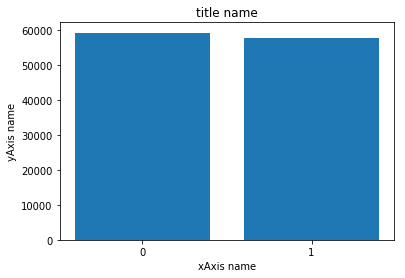

In [88]:
plt.bar(retention_same['Return'].unique(),retention_same['Return'].value_counts())
plt.title('title name')
plt.xlabel('xAxis name')
plt.ylabel('yAxis name')
plt.show()

In [98]:
#Modeling
#Modeling
##Prepare
data_vars = retention_same1.columns.values.tolist()
y = ['Return']
X = [i for i in data_vars if i not in y]

In [99]:
##Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(retention_same1[X], retention_same1[y], test_size=0.3, random_state=0)

In [100]:
##Train
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf_clf = RandomForestClassifier(criterion='entropy', random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [101]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print('RANDOM FOREST TRAINING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n RANDOM FOREST TESTING RESULT:')
print('======================================================')
print('Accuracy:', rf_clf.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

RANDOM FOREST TRAINING RESULT:
Accuracy: 0.9335080448561677
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     41576
           1       0.94      0.93      0.93     40464

    accuracy                           0.93     82040
   macro avg       0.93      0.93      0.93     82040
weighted avg       0.93      0.93      0.93     82040

Confussion Matrix ------------------------------------
[[39096  2480]
 [ 2975 37489]]


 RANDOM FOREST TESTING RESULT:
Accuracy: 0.5378270762229806
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.54      0.55      0.55     17753
           1       0.53      0.52      0.53     17407

    accuracy                           0.54     35160
   macro avg       0.54      0.54      0.54     35160
weighted avg       0.54      0.54      0.54     35160

Confussion Matrix ----------

In [104]:
##Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(retention_same1[X], retention_same1[y], test_size=0.2, random_state=0)

In [109]:
from sklearn.ensemble import AdaBoostClassifier
adab_model = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1, algorithm='SAMME')
adab_model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=1000)

In [110]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = adab_model.predict(X_train)
y_test_pred = adab_model.predict(X_test)

print('Adaboost TRAINING RESULT:')
print('======================================================')
print('Accuracy:', adab_model.score(X_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred))

print('\n======================================================')

print('\n Adaboost TESTING RESULT:')
print('======================================================')
print('Accuracy:', adab_model.score(X_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred))

Adaboost TRAINING RESULT:
Accuracy: 0.5461177474402731
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.55      0.58      0.56     47490
           1       0.54      0.51      0.53     46270

    accuracy                           0.55     93760
   macro avg       0.55      0.55      0.55     93760
weighted avg       0.55      0.55      0.55     93760

Confussion Matrix ------------------------------------
[[27424 20066]
 [22490 23780]]


 Adaboost TESTING RESULT:
Accuracy: 0.5485921501706484
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.55      0.58      0.57     11839
           1       0.55      0.51      0.53     11601

    accuracy                           0.55     23440
   macro avg       0.55      0.55      0.55     23440
weighted avg       0.55      0.55      0.55     23440

Confussion Matrix --------------------